## explore MNIST image, PCA, Logistic Regression
ref: https://en.wikipedia.org/wiki/MNIST_database

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

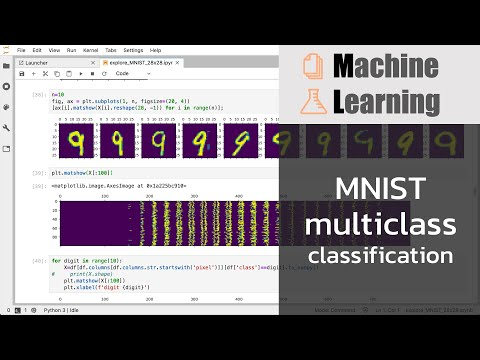

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Z9gB9LHBlsM', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.0.3
numpy   version = 1.18.1
seaborn version = 0.10.0


In [4]:
pd.Timestamp.now()

Timestamp('2020-04-15 12:41:35.033945')

## read MNIST data

In [5]:
data_file='https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')
df=pd.read_csv(data_file)
df.head()

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [6]:
28*28

784

$$x^2=784$$
$$x=\sqrt{784}$$
$$x=28$$

In [7]:
np.sqrt(784)

28.0

In [8]:
df.iloc[:, 0:784].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.iloc[0, 0:784]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

In [10]:
df.iloc[0, 0:784].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   2,  59, 229, 25

In [11]:
np.set_printoptions(linewidth=1000)

In [12]:
df.iloc[100, 0:784].to_numpy().reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 203, 218,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 203, 253, 238,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  95, 254, 253, 248, 118,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 136, 253, 254, 249, 118,   0,   0

In [13]:
# cmap (colormap)
from IPython.display import IFrame
IFrame('https://matplotlib.org/tutorials/colors/colormaps.html', width=800, height=240)

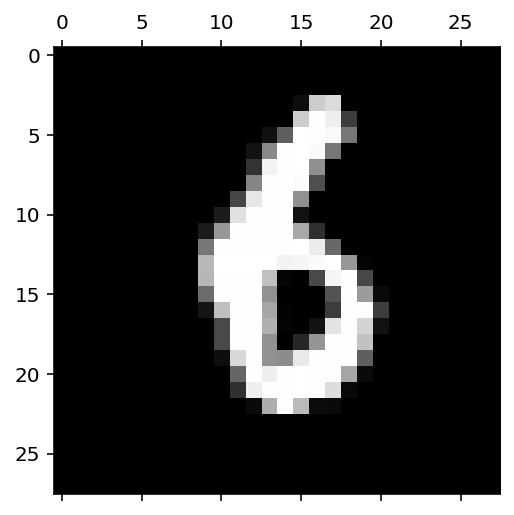

In [14]:
plt.matshow(df.iloc[100, 0:784].to_numpy().reshape(28, -1), cmap='gray')

In [15]:
df[:10]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


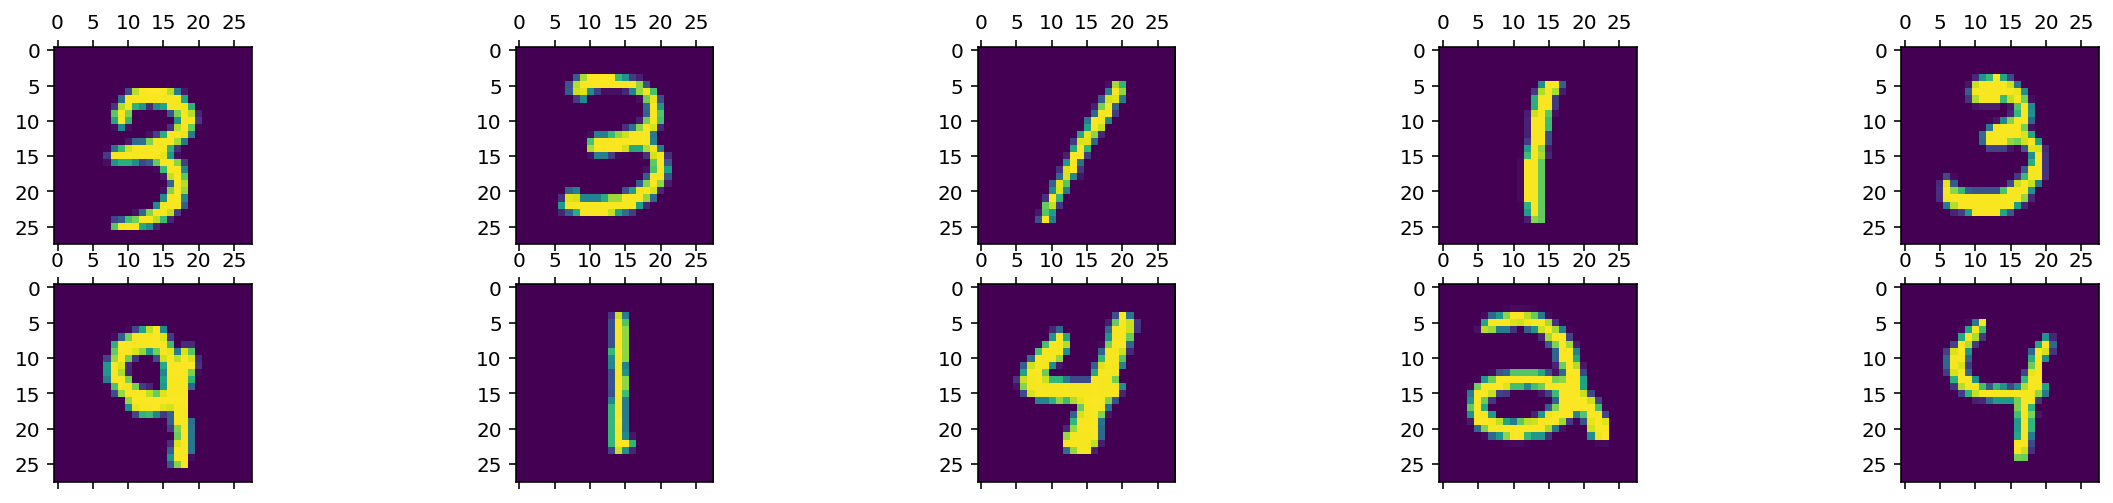

In [16]:
n=10
n_rows=2
n_cols=math.ceil(n / n_rows)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 4))
ax=ax.ravel()
[ax[i].matshow(df.iloc[i, 0:784].to_numpy().reshape(28, -1)) for i in range(n)];

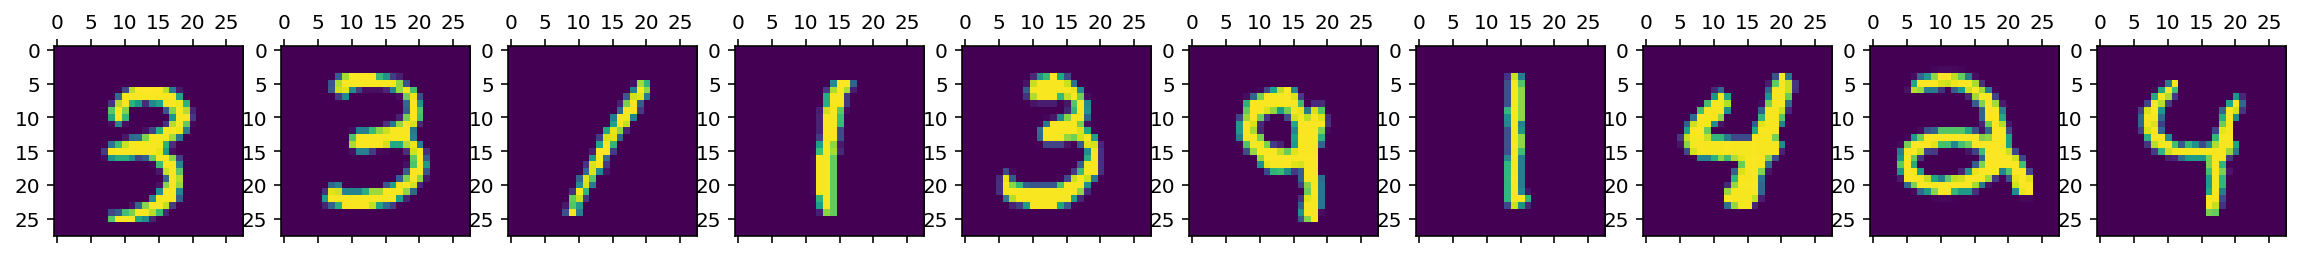

In [17]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(df.iloc[i, 0:784].to_numpy().reshape(28, -1)) for i in range(n)];

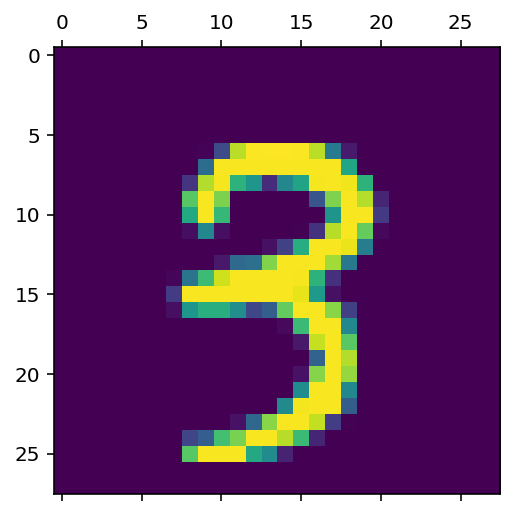

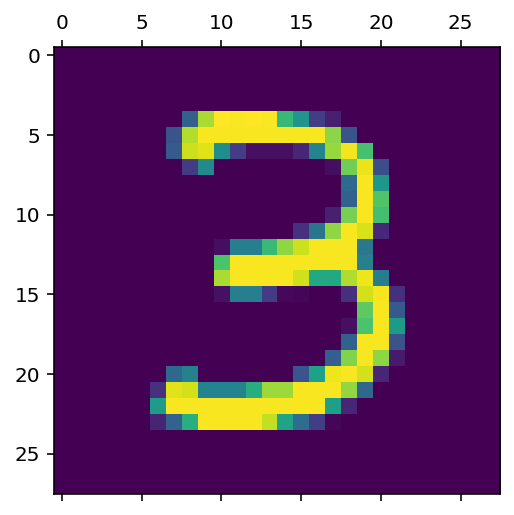

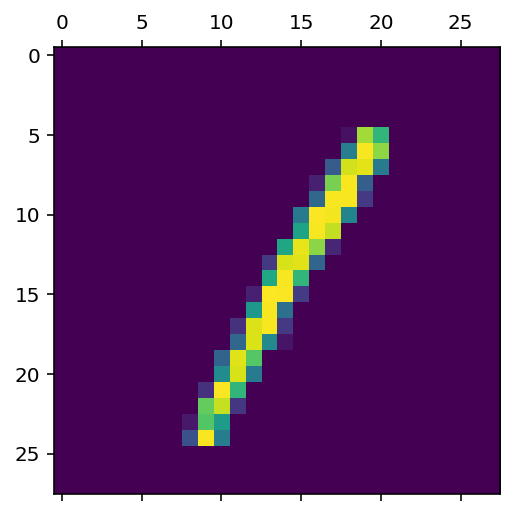

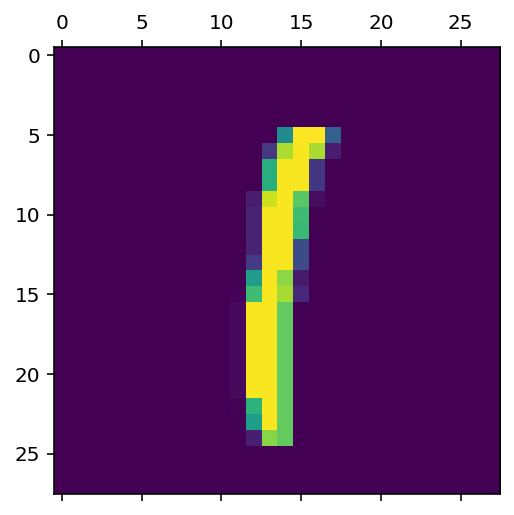

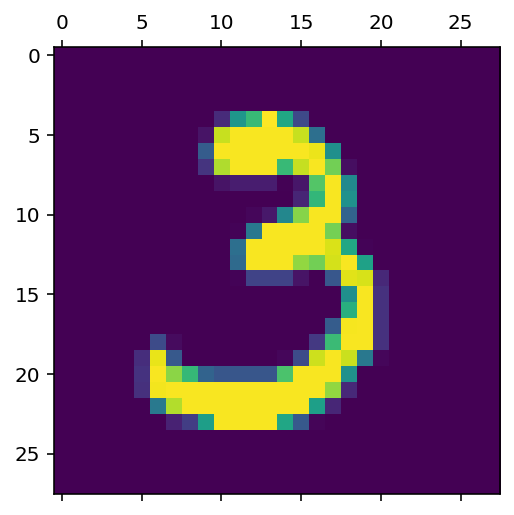

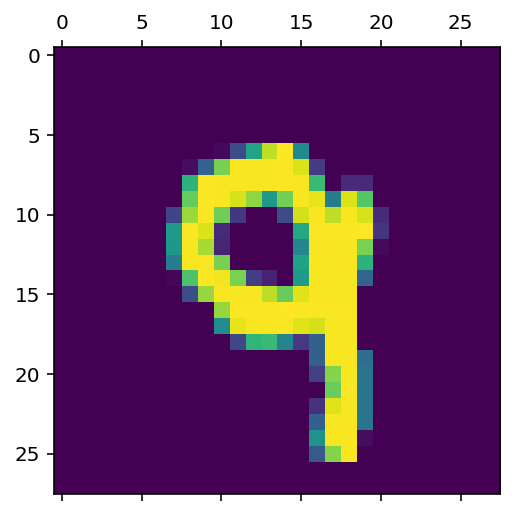

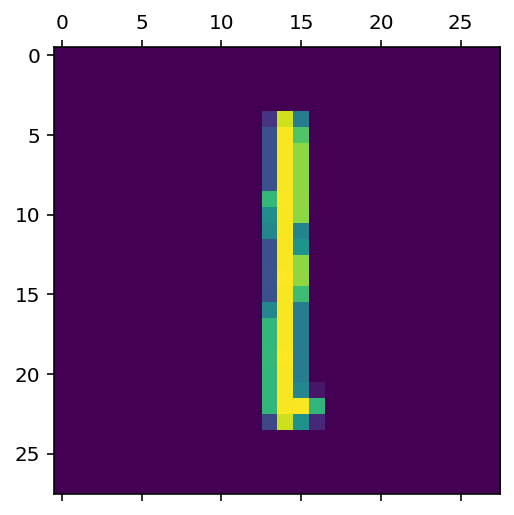

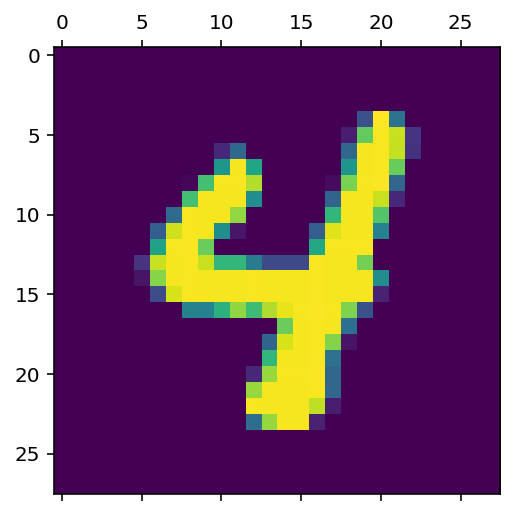

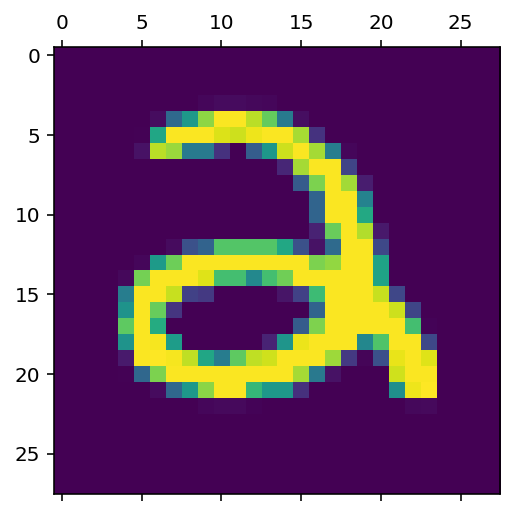

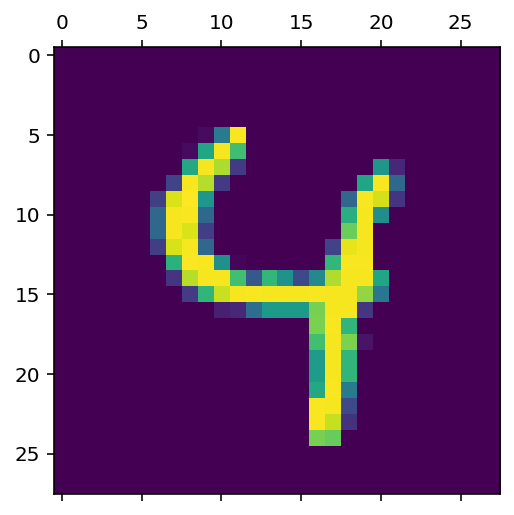

In [18]:
for i in range(10):
    plt.matshow(df.iloc[i, 0:784].to_numpy().reshape(28, -1))

In [19]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [20]:
df[df.columns[df.columns.str.startswith('pixel')]].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.drop(columns=['class']).head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.drop(columns=['class']).iloc[1].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 223, 255, 254, 255, 254, 171, 133,  47,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  65, 226, 253, 253, 253, 253, 253, 253, 253, 253, 211,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 236, 243, 126,  46,  10,  10,  10,  27, 114, 216, 251, 181,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   

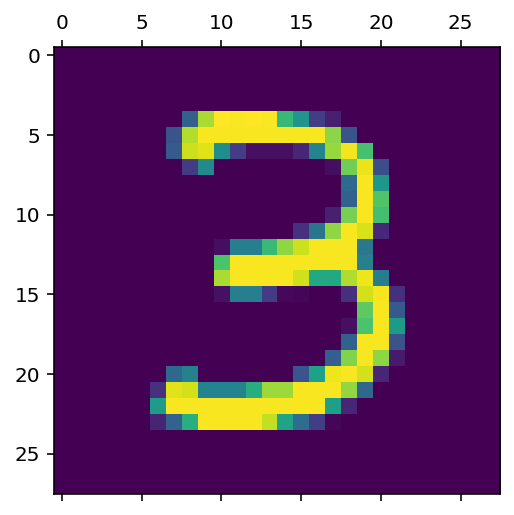

In [23]:
plt.matshow(df.drop(columns=['class']).iloc[1].to_numpy().reshape(28, -1))

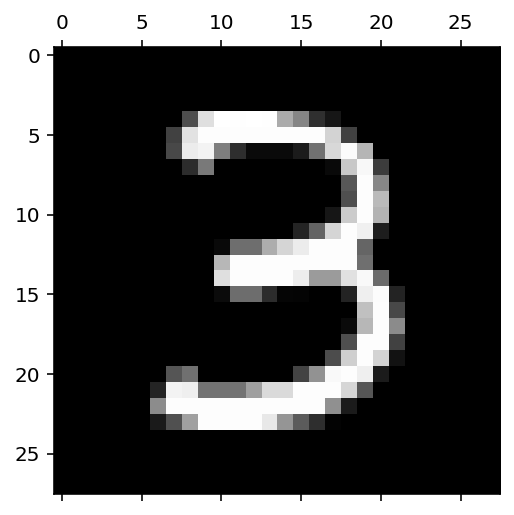

In [24]:
plt.matshow(df.drop(columns=['class']).iloc[1].to_numpy().reshape(28, -1), cmap='gray')

In [25]:
X=df.drop(columns=['class']).to_numpy()
print(f'shape = {X.shape}')

shape = (5000, 784)


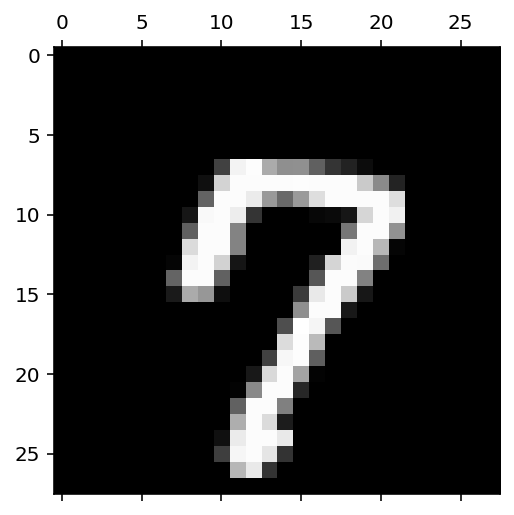

In [26]:
plt.matshow(X[55].reshape(28, -1), cmap='gray')

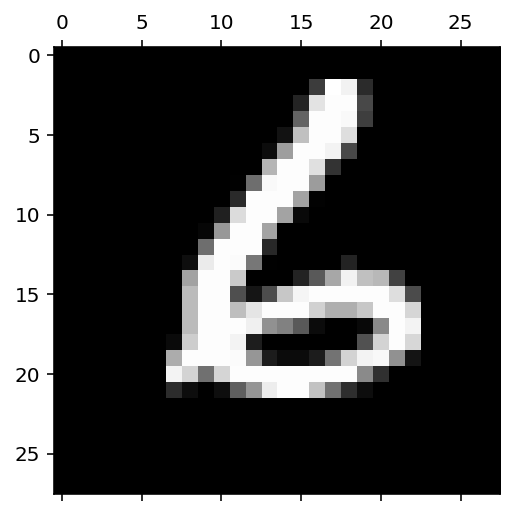

In [27]:
plt.matshow(X[51].reshape(28, -1), cmap='gray')

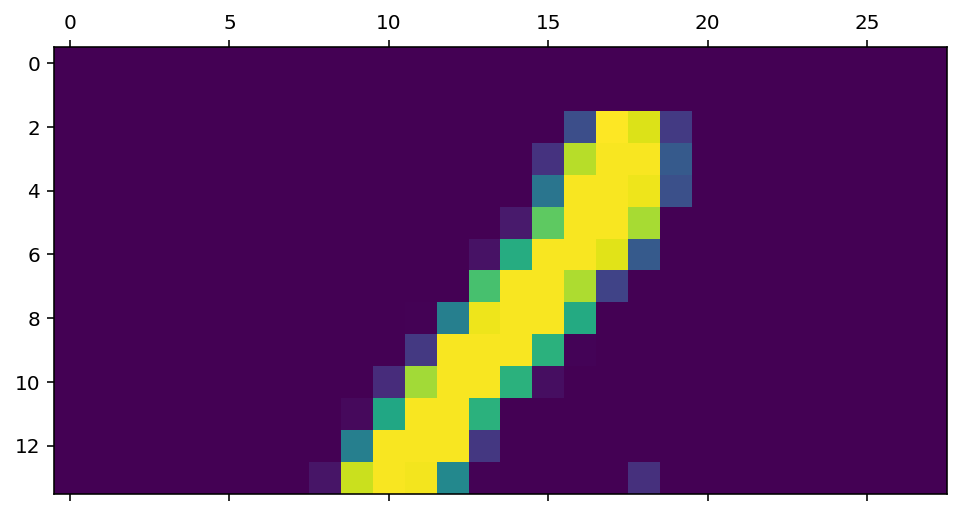

In [28]:
A=X[51].reshape(28, -1)
plt.matshow(A[:14])

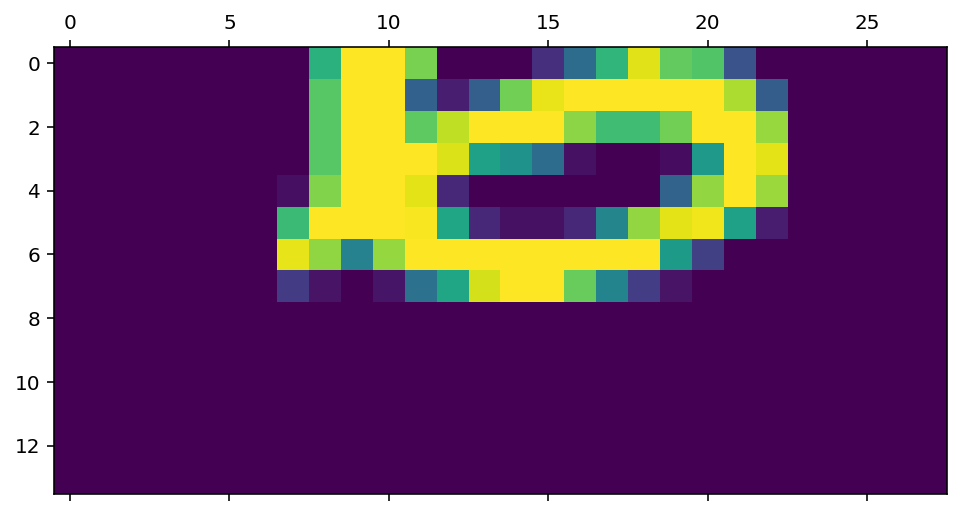

In [29]:
plt.matshow(A[14:])

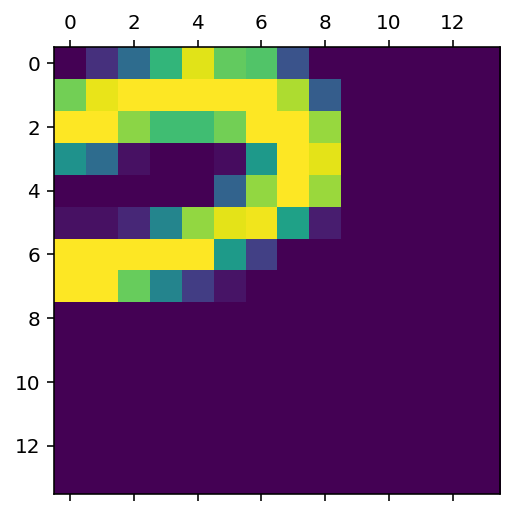

In [30]:
plt.matshow(A[14:, 14:])

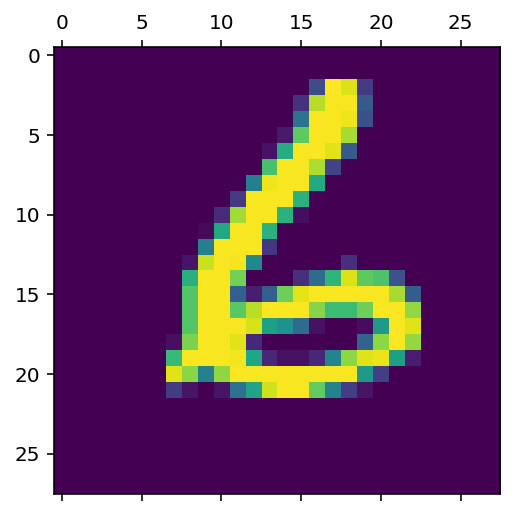

In [31]:
plt.matshow(X[51].reshape(28, -1))

## filter rows having 'class' = 9

In [32]:
digit=9
X=df[df.columns[df.columns.str.startswith('pixel')]][df['class']==digit].to_numpy()
# X=df[df['class']==digit].drop(columns=['class']).to_numpy()
print(f'shape = {X.shape}')
X[:5]

shape = (532, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

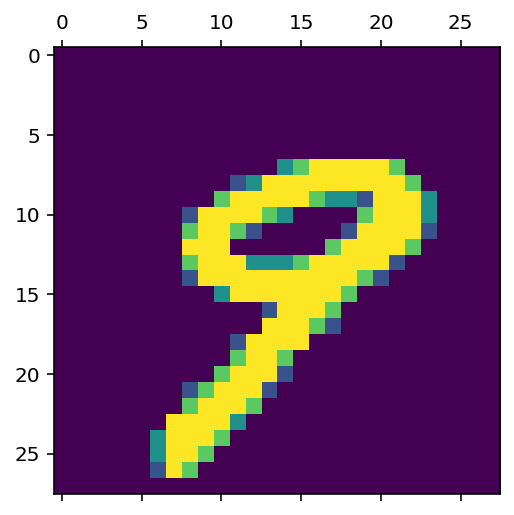

In [33]:
plt.matshow(X[100].reshape(28, -1))

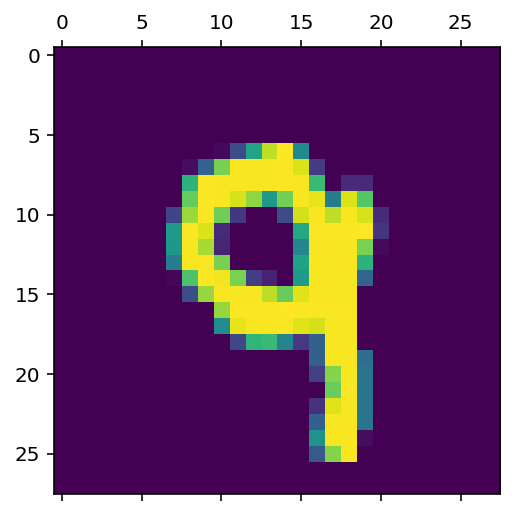

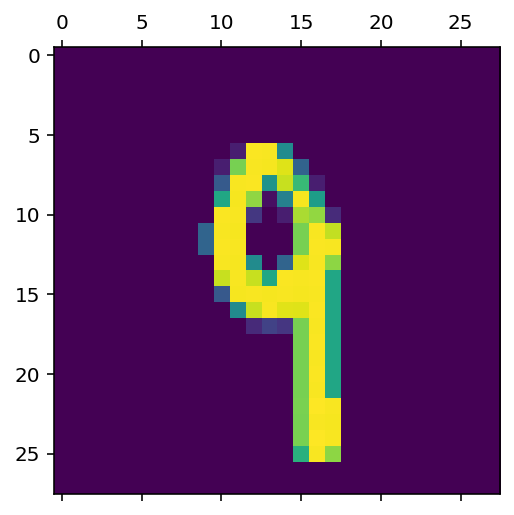

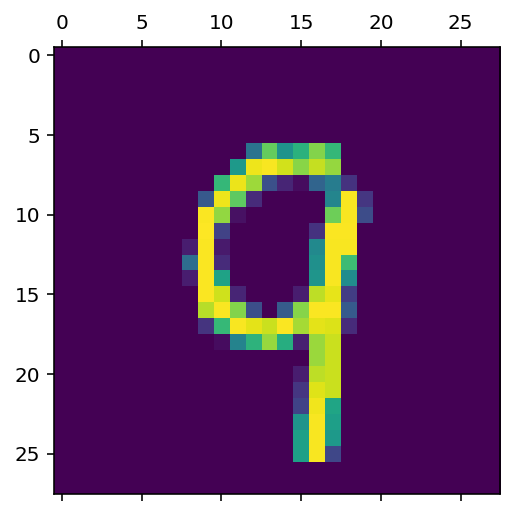

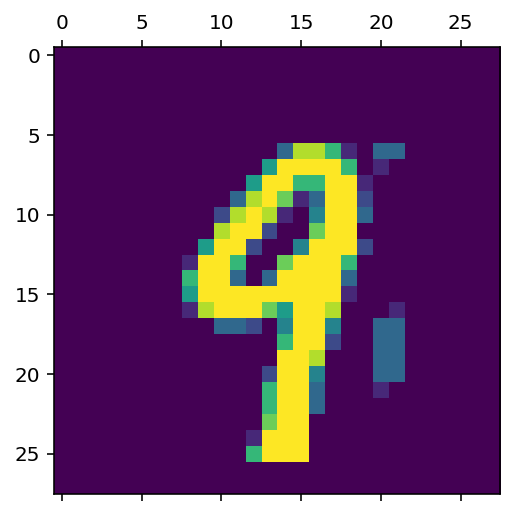

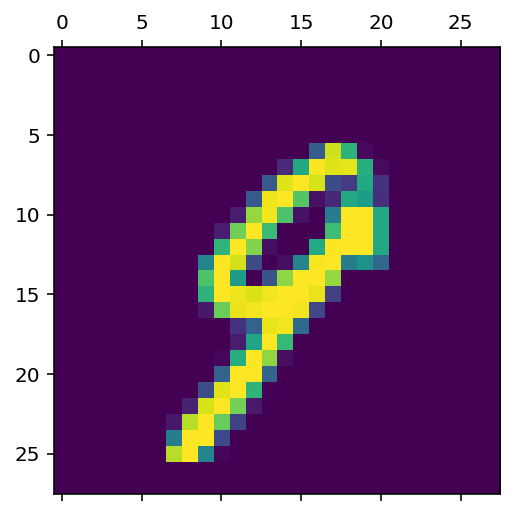

In [34]:
[plt.matshow(X[i].reshape(28, -1)) for i in range(5)];

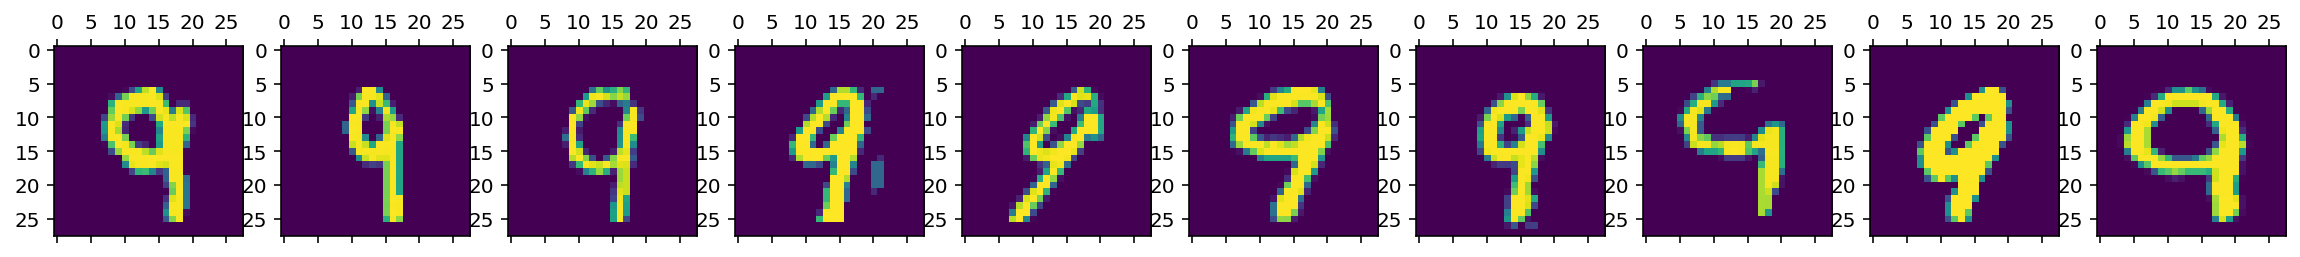

In [35]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(X[i].reshape(28, -1)) for i in range(n)];

In [36]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


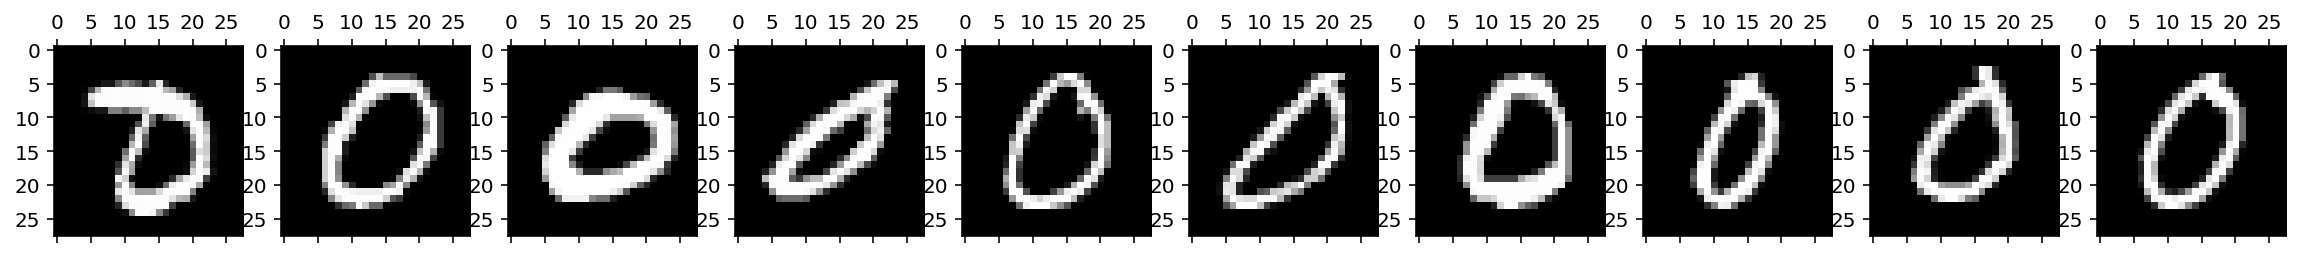

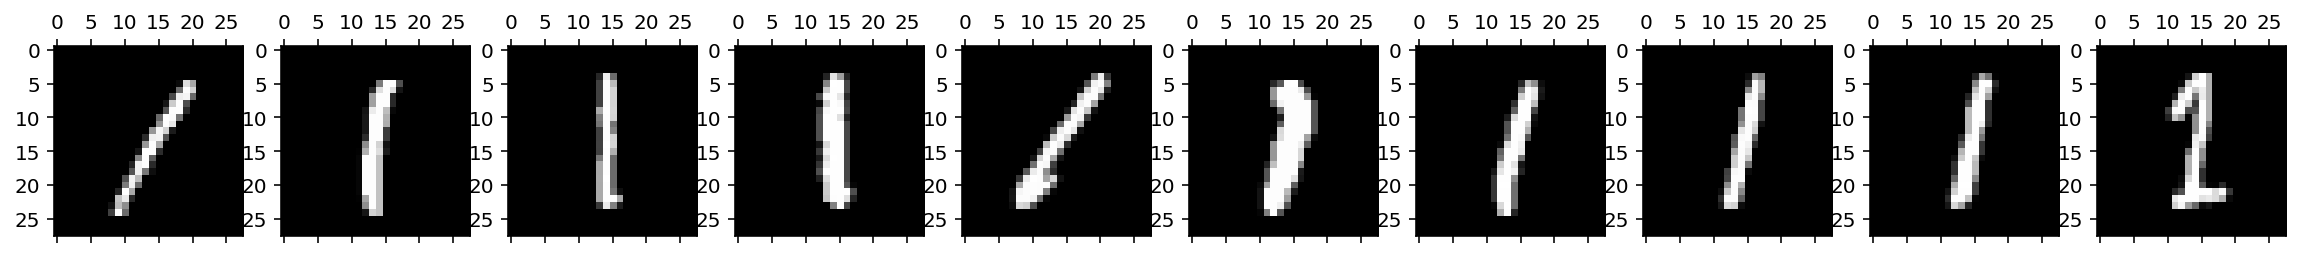

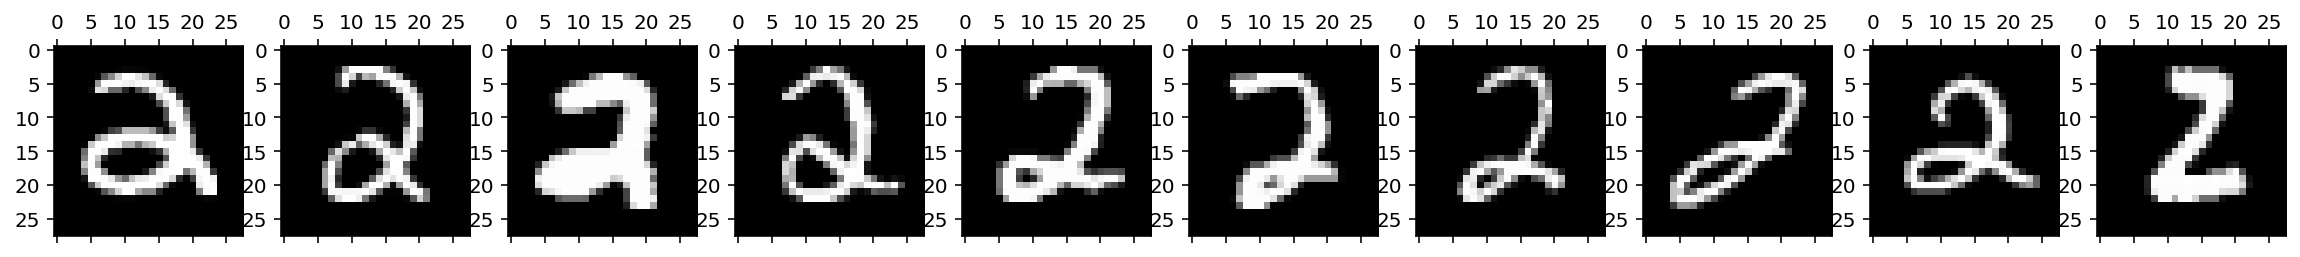

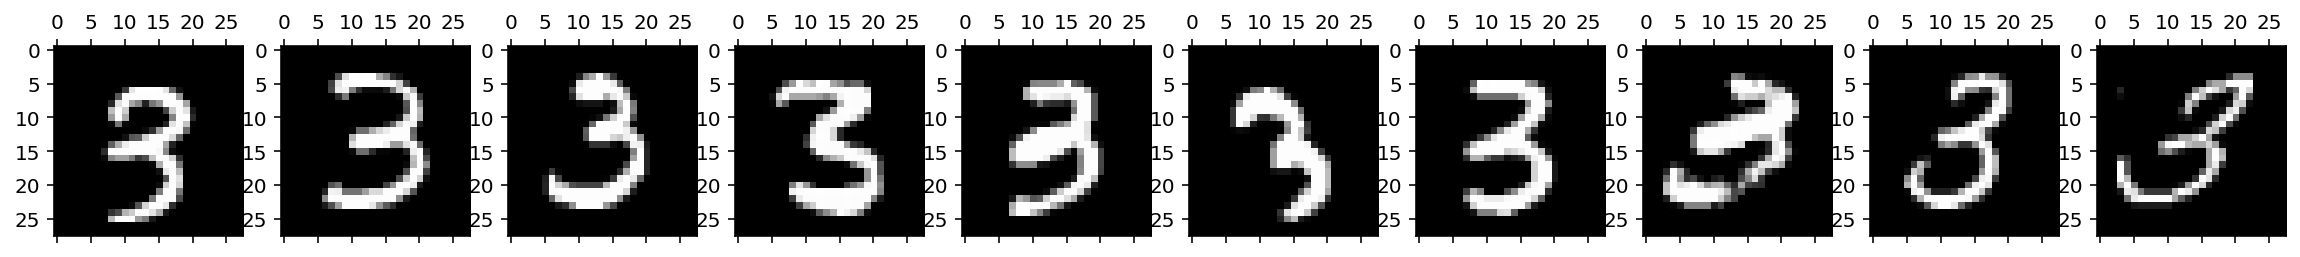

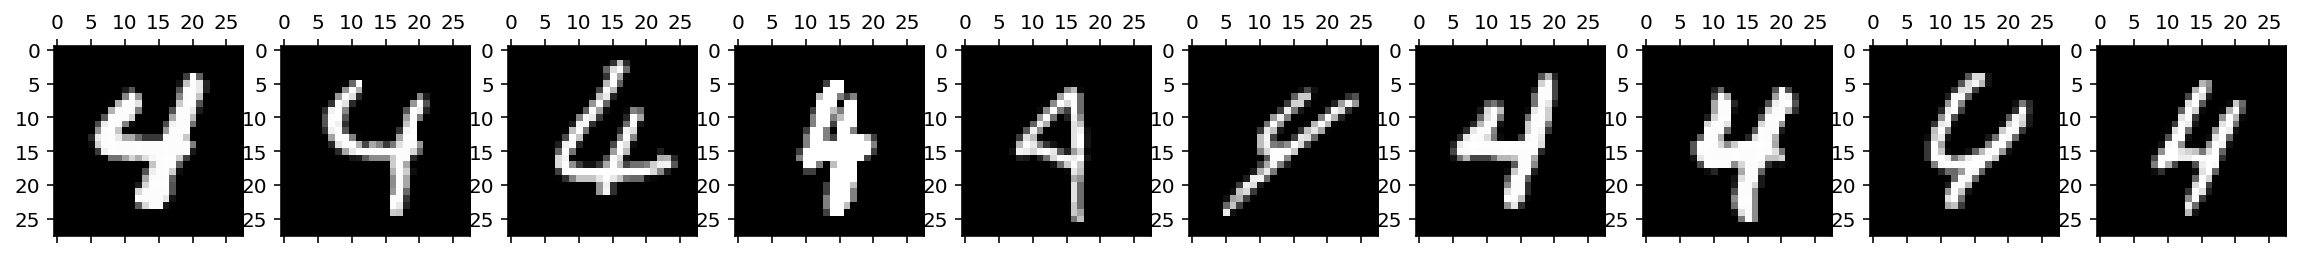

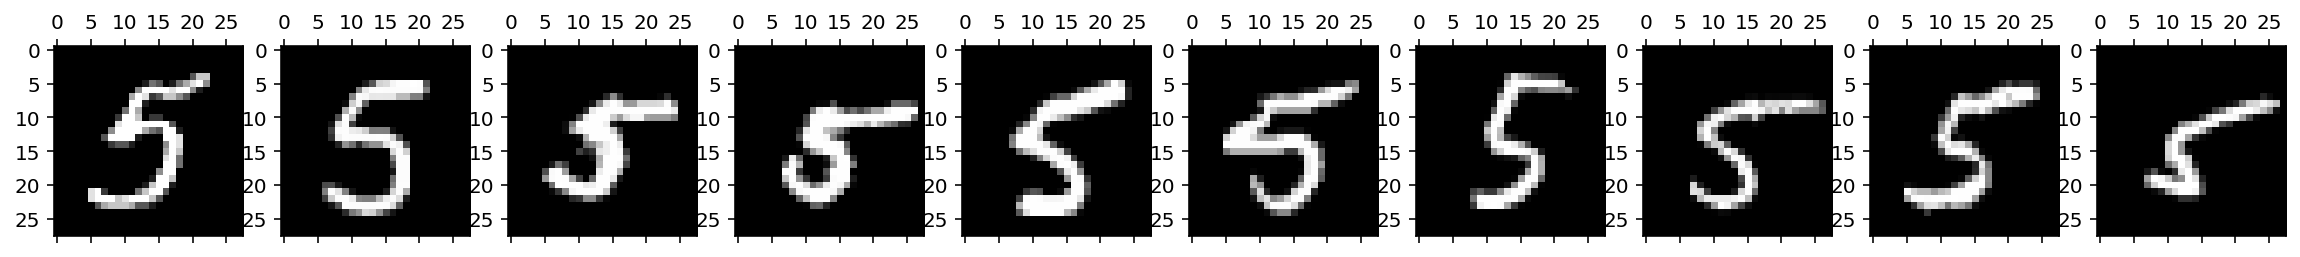

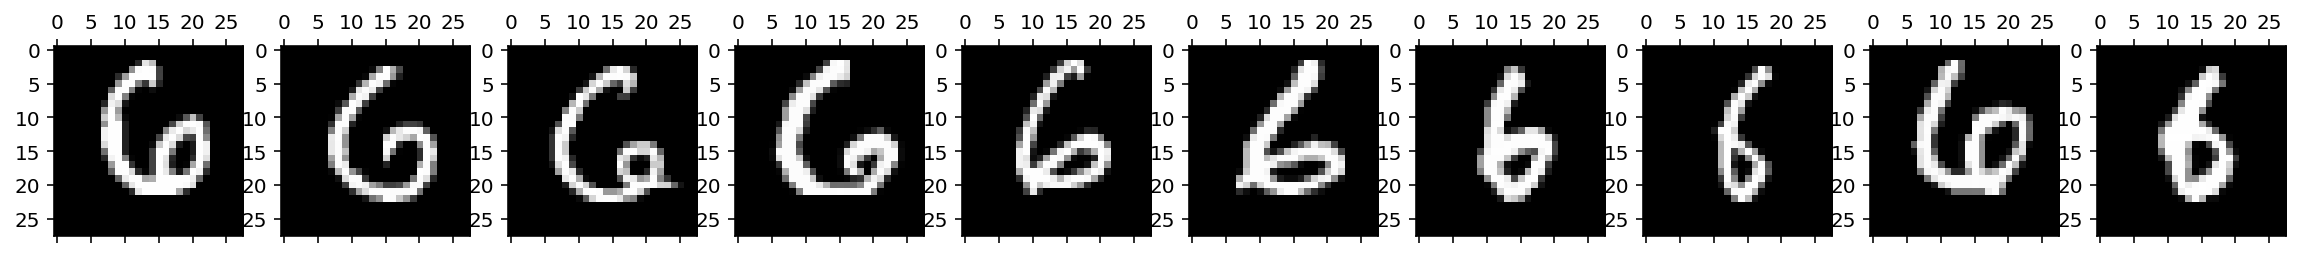

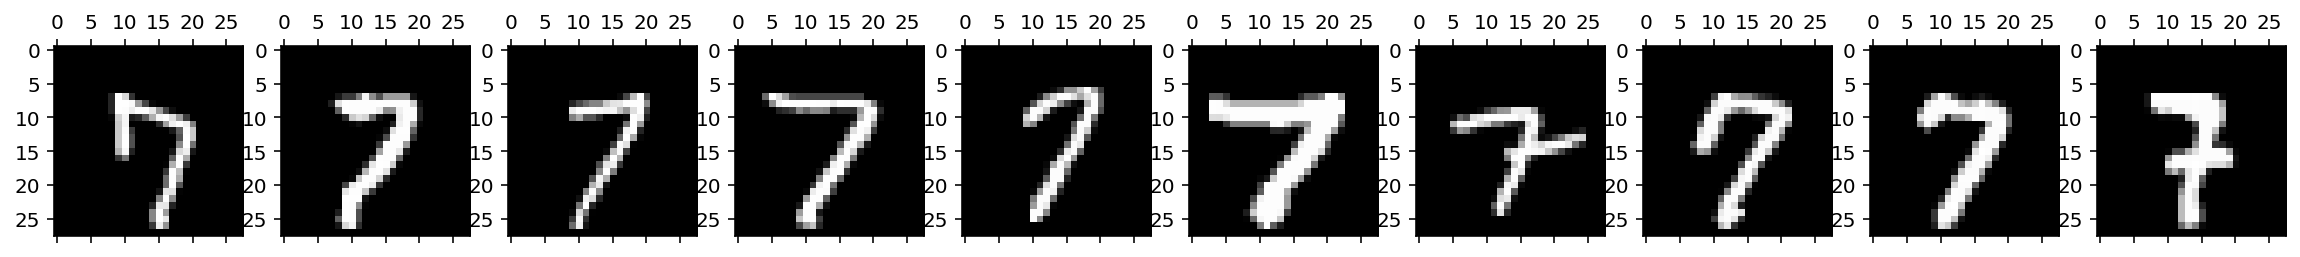

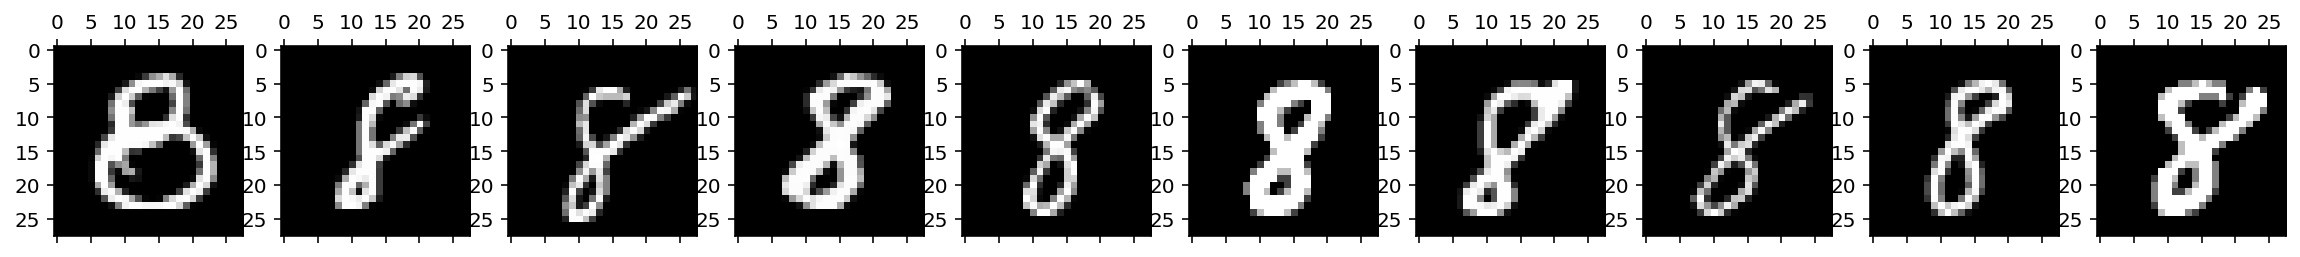

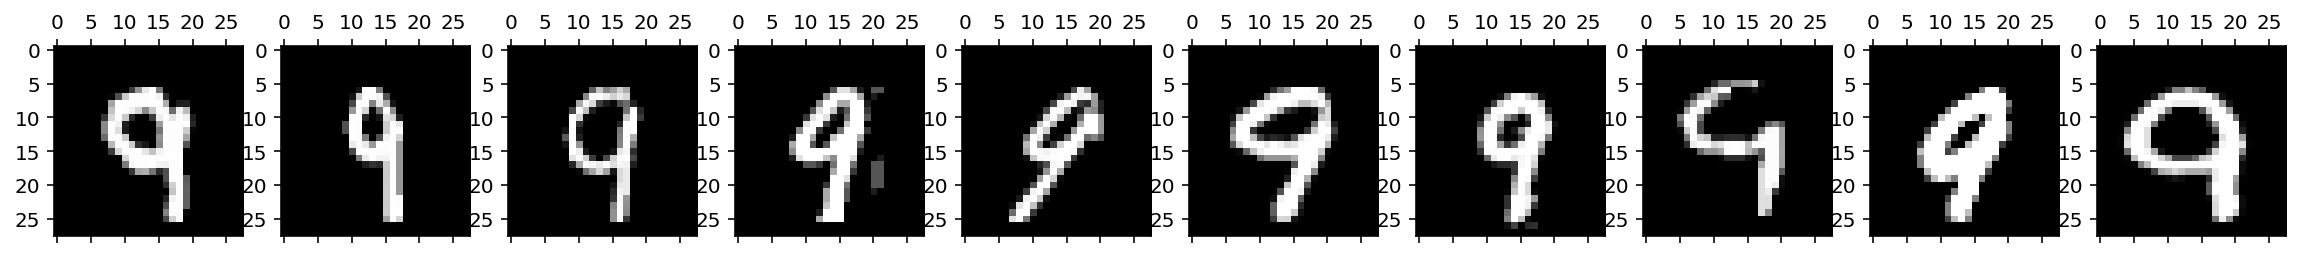

In [37]:
for digit in range(10):
    X=df[df.columns[df.columns.str.startswith('pixel')]][df['class']==digit].to_numpy()
#     print(f'shape = {X.shape}')
    n=10
    fig, ax = plt.subplots(1, n, figsize=(20, 2))
    [ax[i].matshow(X[i].reshape(28, -1), cmap='gray') for i in range(n)];

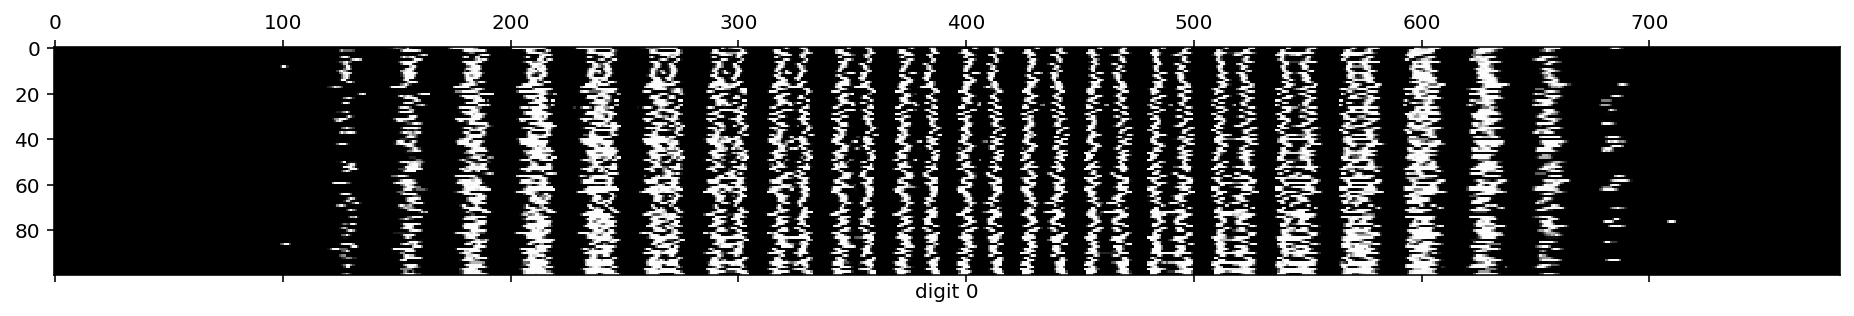

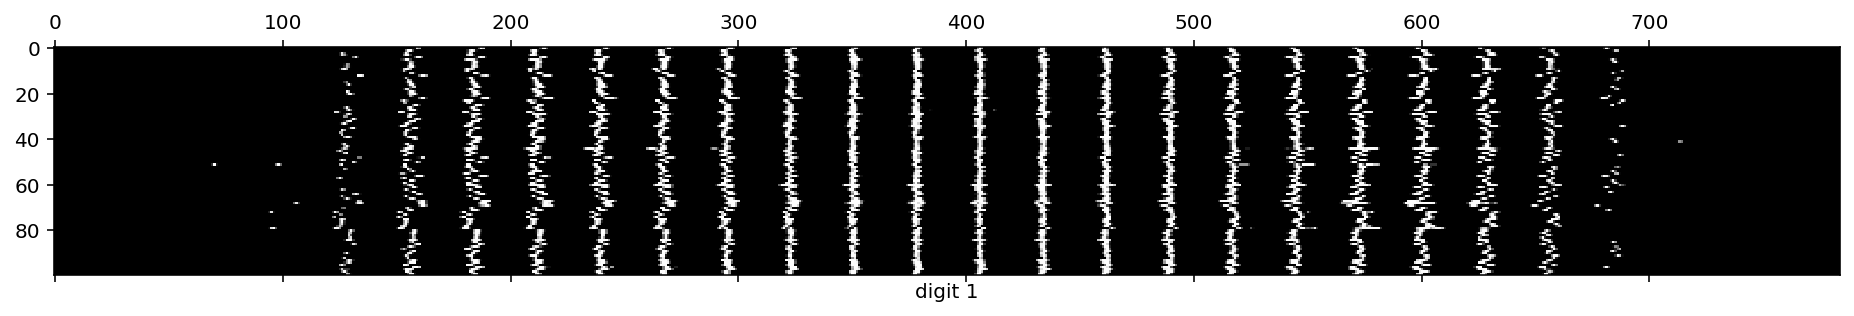

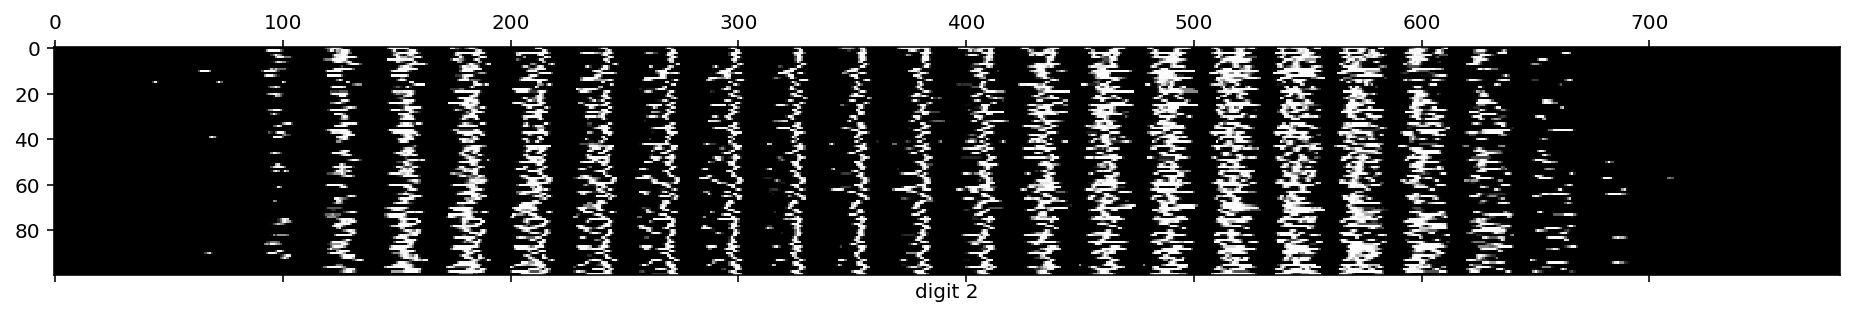

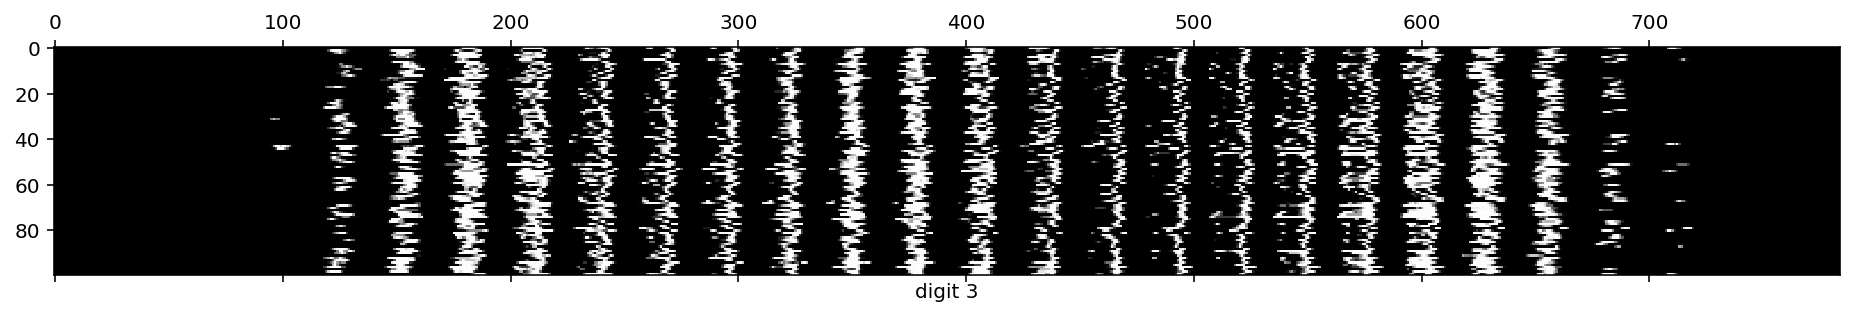

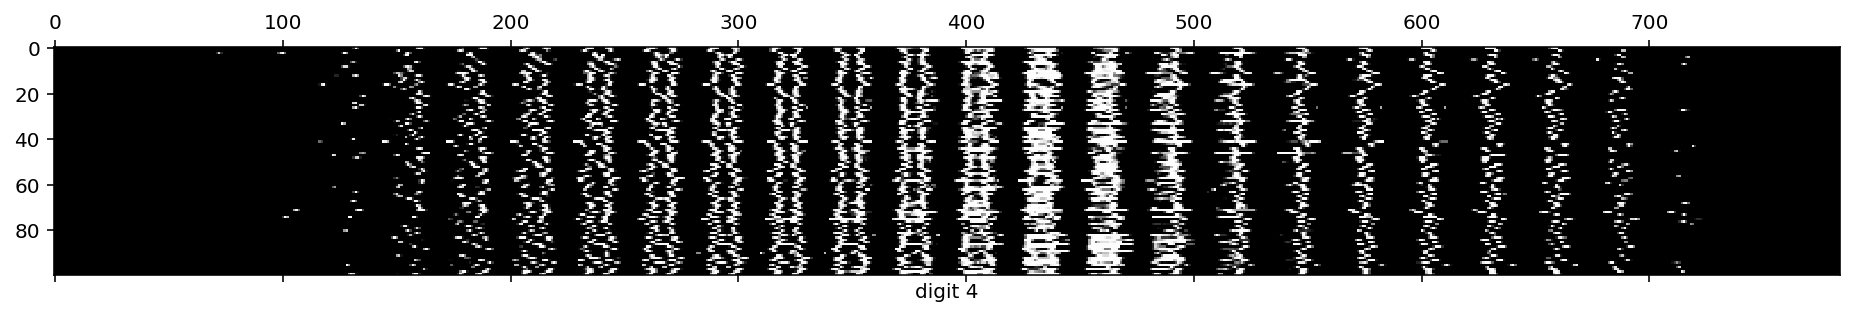

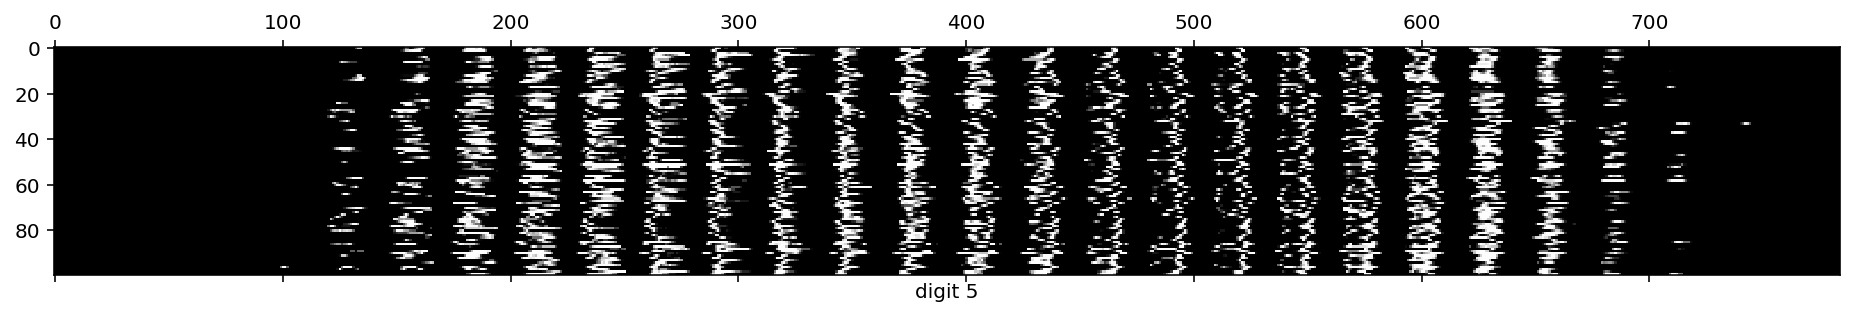

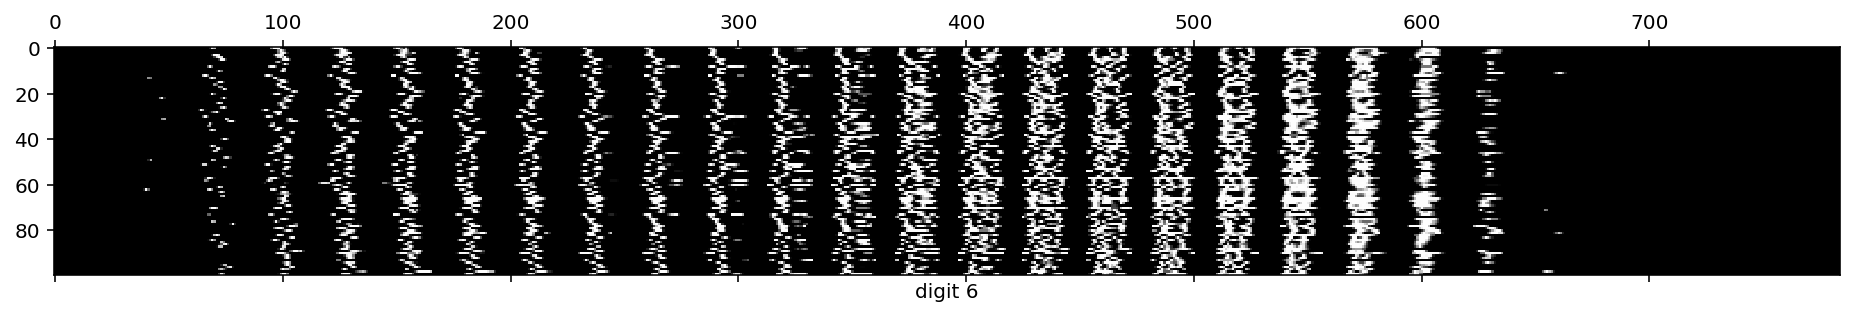

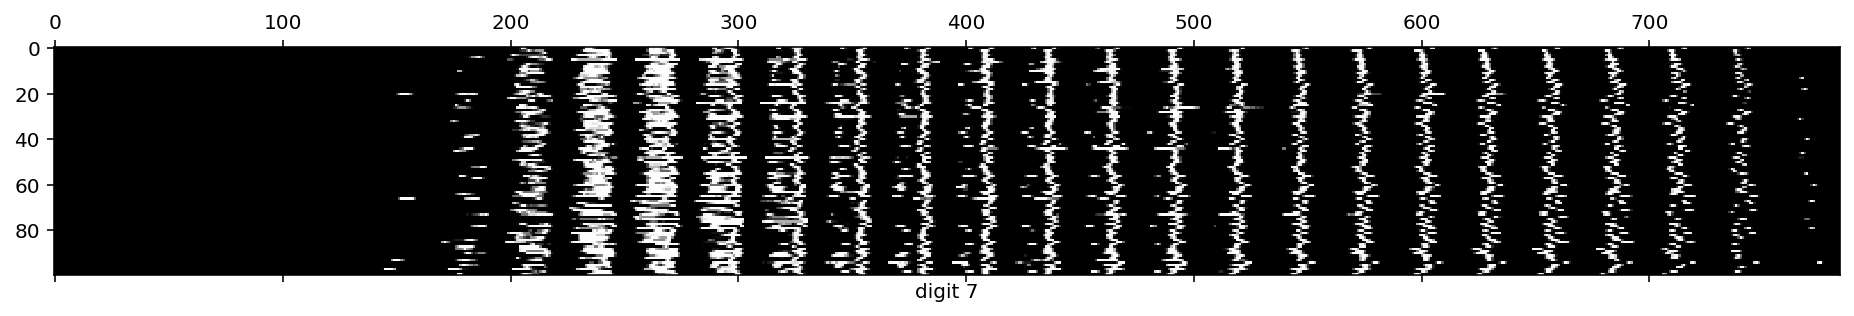

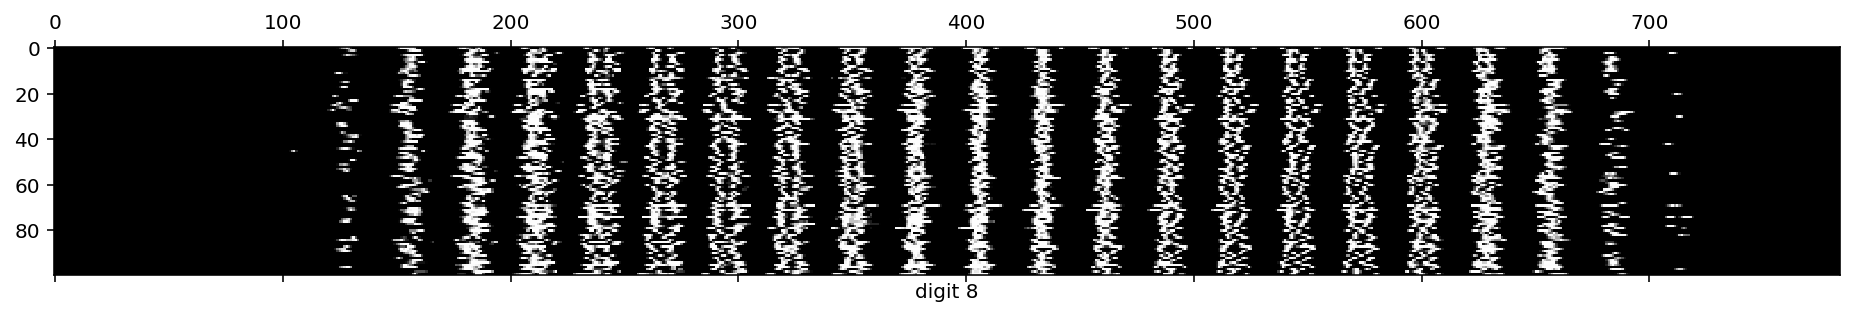

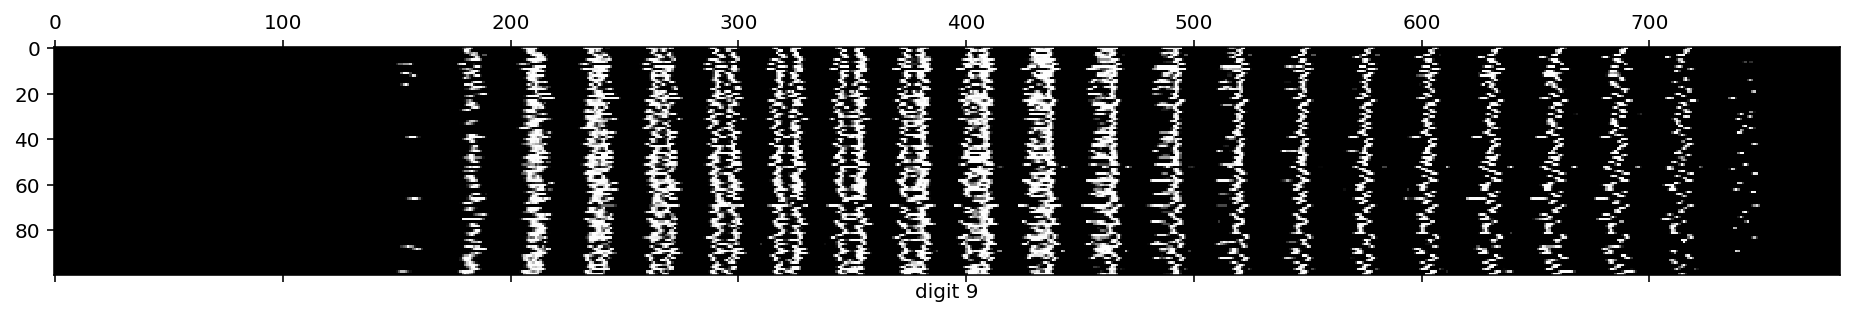

In [38]:
for digit in range(10):
    X=df[df.columns[df.columns.str.startswith('pixel')]][df['class']==digit].to_numpy()
#     print(X.shape)
    plt.matshow(X[:100], cmap='gray')
    plt.xlabel(f'digit {digit}')

---
## Classify handwritten digits using Logistic Regression, SVC, etc

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [40]:
print(f'data_file: {data_file}')
df=pd.read_csv(data_file)
df.head()

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [41]:
D=df[df.columns[df.columns.str.startswith('pixel')]].to_numpy()
D.shape

(5000, 784)

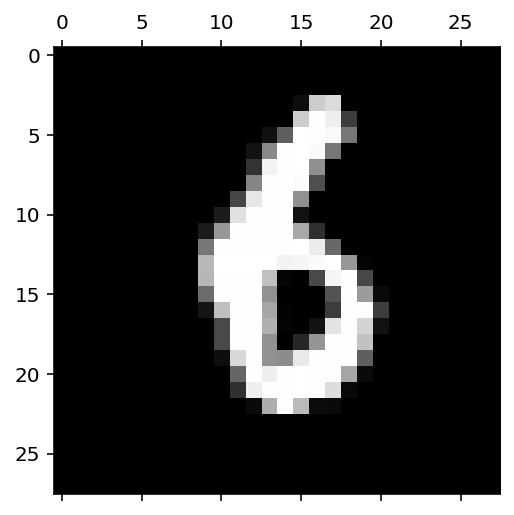

In [42]:
plt.matshow(D[100].reshape(28, -1), cmap='gray')

In [43]:
df['class'][:5] # target/label

0    3
1    3
2    1
3    1
4    3
Name: class, dtype: int64

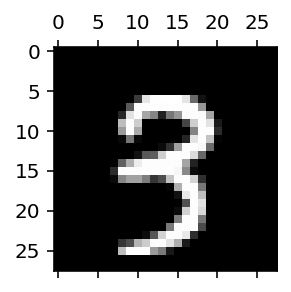

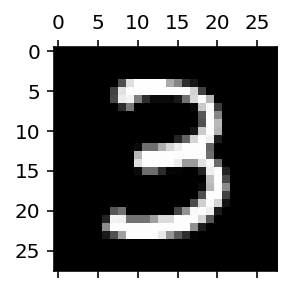

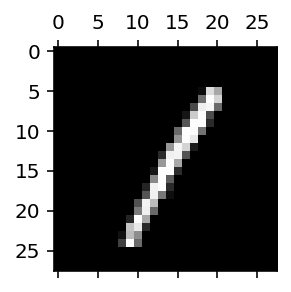

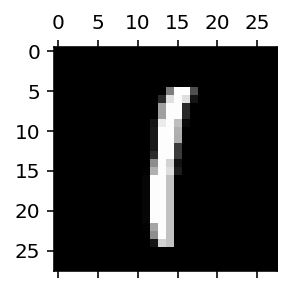

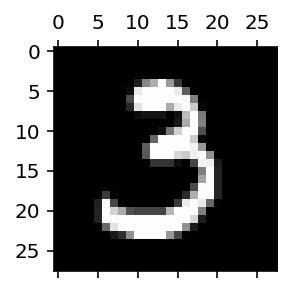

In [44]:
for i in range(5):
    matfig = plt.figure(figsize=(2,2))
    plt.matshow(D[i].reshape(28, -1), cmap='gray', fignum=matfig.number)

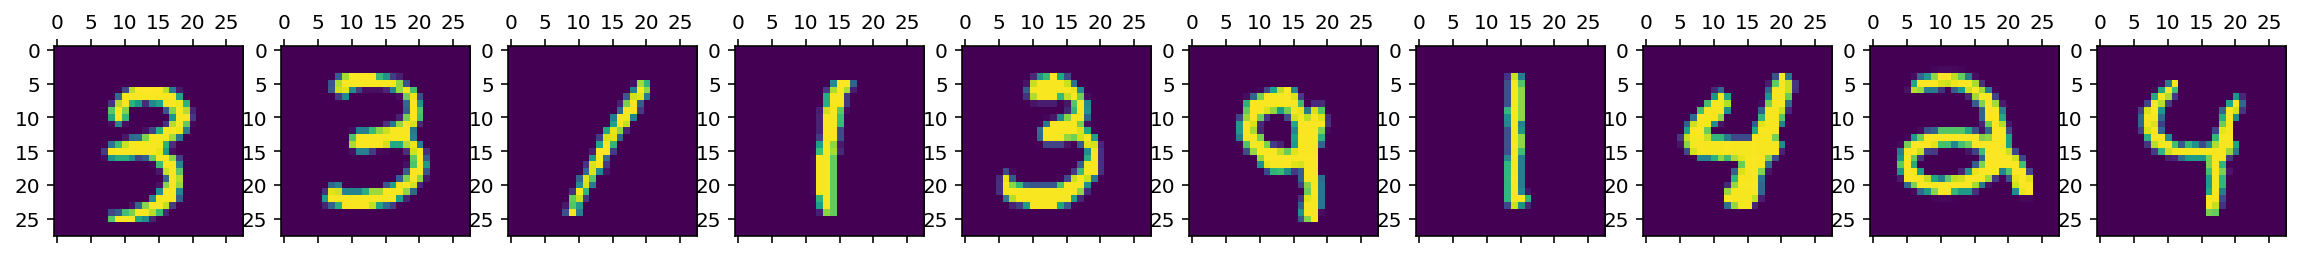

In [45]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(D[i].reshape(28, -1)) for i in range(n)];

## train test split

In [46]:
from sklearn.model_selection import train_test_split
X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=7, stratify=y)

In [47]:
X_train.shape

(4000, 784)

In [48]:
X_test.shape

(1000, 784)

In [49]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Classifier

In [50]:
model=LogisticRegression()
# model=SVC()
model.fit(X_train, y_train)
print(f'train score={model.score(X_train, y_train):.4f}\ntest  score={model.score(X_test, y_test):.4f}')

train score=1.0000
test  score=0.8640


C:\Users\prasert\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### compare multiple models

In [51]:
models=[LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GaussianNB()]
for model in models:
    model.fit(X_train, y_train)
    print(f'{model.__class__}')
    print(f'train score={model.score(X_train, y_train):.4f}\ntest  score={model.score(X_test, y_test):.4f}')
    print('-' * 100)

C:\Users\prasert\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<class 'sklearn.linear_model._logistic.LogisticRegression'>
train score=1.0000
test  score=0.8640
----------------------------------------------------------------------------------------------------
<class 'sklearn.svm._classes.SVC'>
train score=0.9855
test  score=0.9420
----------------------------------------------------------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
train score=1.0000
test  score=0.7440
----------------------------------------------------------------------------------------------------
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
train score=1.0000
test  score=0.9310
----------------------------------------------------------------------------------------------------
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
train score=0.5292
test  score=0.5300
----------------------------------------------------------------------------------------------------
<class 'sklearn.naive_bayes.Gaussi

In [52]:
predicted = model.predict(X_test)
predicted[:10]

array([7, 6, 1, 0, 7, 1, 8, 0, 9, 6], dtype=int64)

In [53]:
y_test[:10]

2969    7
1846    6
3506    1
1876    0
160     7
1773    1
4420    3
3281    2
174     4
2360    6
Name: class, dtype: int64

In [54]:
cm=metrics.confusion_matrix(y_test, predicted)
cm

array([[ 82,   0,   2,   0,   1,   0,   3,   0,   4,   0],
       [  0, 112,   0,   0,   0,   0,   4,   0,   3,   2],
       [ 15,   4,  20,  14,   2,   0,  23,   2,  23,   1],
       [  8,   7,   2,  20,   1,   0,   4,   0,  55,   7],
       [  6,   4,   2,   1,  11,   1,  11,   1,  26,  29],
       [ 12,   5,   0,   3,   2,   4,   5,   0,  56,   5],
       [  1,   1,   1,   0,   1,   1,  89,   0,   3,   0],
       [  1,   1,   2,   4,   0,   0,   1,  52,   5,  40],
       [  2,  11,   1,   1,   3,   3,   4,   0,  55,   6],
       [  0,   1,   1,   0,   3,   0,   0,   1,   5,  95]], dtype=int64)

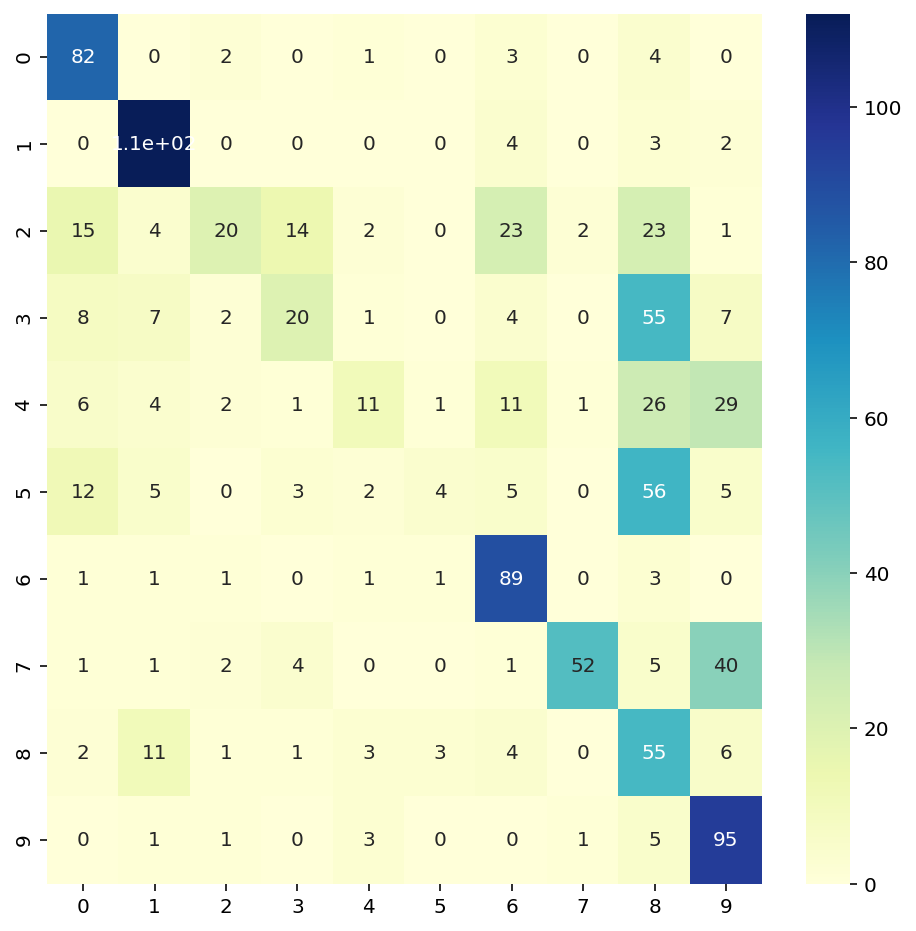

In [55]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap="YlGnBu");

In [56]:
cm=cm.astype('float')
cm[cm == 0] = np.nan
cm

array([[ 82.,  nan,   2.,  nan,   1.,  nan,   3.,  nan,   4.,  nan],
       [ nan, 112.,  nan,  nan,  nan,  nan,   4.,  nan,   3.,   2.],
       [ 15.,   4.,  20.,  14.,   2.,  nan,  23.,   2.,  23.,   1.],
       [  8.,   7.,   2.,  20.,   1.,  nan,   4.,  nan,  55.,   7.],
       [  6.,   4.,   2.,   1.,  11.,   1.,  11.,   1.,  26.,  29.],
       [ 12.,   5.,  nan,   3.,   2.,   4.,   5.,  nan,  56.,   5.],
       [  1.,   1.,   1.,  nan,   1.,   1.,  89.,  nan,   3.,  nan],
       [  1.,   1.,   2.,   4.,  nan,  nan,   1.,  52.,   5.,  40.],
       [  2.,  11.,   1.,   1.,   3.,   3.,   4.,  nan,  55.,   6.],
       [ nan,   1.,   1.,  nan,   3.,  nan,  nan,   1.,   5.,  95.]])

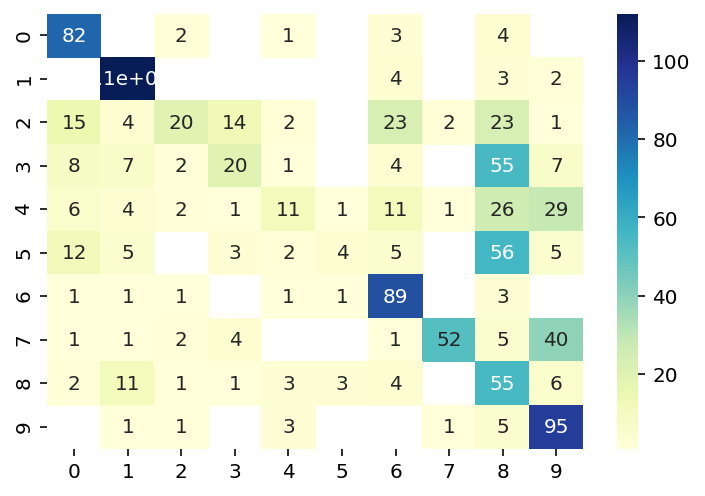

In [57]:
sns.heatmap(cm, annot=True, cmap="YlGnBu");

In [58]:
model.score(X_test, y_test)

0.54

In [59]:
metrics.accuracy_score(y_test, predicted)

0.54

In [60]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75        92
           1       0.77      0.93      0.84       121
           2       0.65      0.19      0.30       104
           3       0.47      0.19      0.27       104
           4       0.46      0.12      0.19        92
           5       0.44      0.04      0.08        92
           6       0.62      0.92      0.74        97
           7       0.93      0.49      0.64       106
           8       0.23      0.64      0.34        86
           9       0.51      0.90      0.65       106

    accuracy                           0.54      1000
   macro avg       0.57      0.53      0.48      1000
weighted avg       0.58      0.54      0.49      1000



In [61]:
pd.crosstab(y_test, predicted, margins=True)

col_0,0,1,2,3,4,5,6,7,8,9,All
class,,,,,,,,,,,
0,82,0,2,0,1,0,3,0,4,0,92
1,0,112,0,0,0,0,4,0,3,2,121
2,15,4,20,14,2,0,23,2,23,1,104
3,8,7,2,20,1,0,4,0,55,7,104
4,6,4,2,1,11,1,11,1,26,29,92
5,12,5,0,3,2,4,5,0,56,5,92
6,1,1,1,0,1,1,89,0,3,0,97
7,1,1,2,4,0,0,1,52,5,40,106
8,2,11,1,1,3,3,4,0,55,6,86


## Principal Component Analysis (PCA)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

In [63]:
X_train.shape

(4000, 784)

In [64]:
scaler.mean_[:50]

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.02125, 0.08875, 0.12025, 0.07275, 0.0765 , 0.119  , 0.17925, 0.11225, 0.10525, 0.13225, 0.17175, 0.1185 , 0.08525, 0.059  , 0.01125, 0.     ])

In [65]:
np.sqrt(scaler.var_[:50])

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 1.3438    , 4.31223532, 5.38486675, 4.02435802, 3.77082852, 4.32693182, 6.52208705, 3.69691086, 4.48688895, 5.17452992, 5.68091119, 4.99929573, 3.35022125, 3.73102117, 0.71142353, 0.        ])

## standardized data

In [66]:
from sklearn.decomposition import PCA 

# If 0 < n_components < 1 and svd_solver == 'full', 
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
pca = PCA(.9)
# pca = PCA(n_components=100)

pca.fit(X_train_t)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
pca.n_components_

176

In [68]:
X_train_pca = pca.transform(X_train_t) # Apply dimensionality reduction to X_train_t
X_test_pca = pca.transform(X_test_t) # Apply dimensionality reduction to X_test_t

In [69]:
X_train_pca.shape

(4000, 176)

In [70]:
X_test_pca.shape

(1000, 176)

In [71]:
pca.components_

array([[ 1.20410734e-19, -6.24500451e-17, -8.32667268e-17, ..., -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 5.09744332e-19,  2.77555756e-17,  5.55111512e-17, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.76369288e-18,  0.00000000e+00,  1.11022302e-16, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.62709114e-18,  3.46944695e-18, -2.77555756e-17, ..., -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 6.90251876e-18,  5.55111512e-17, -2.08166817e-17, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.73290259e-18,  5.20417043e-17,  9.02056208e-17, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [72]:
pca.components_.shape

(176, 784)

In [73]:
X_train[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
pd.DataFrame(X_train_pca[:2])

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
0,0.816266,2.397699,-7.579527,3.755628,-0.933608,1.37651,-4.111380,-0.629913,-3.303689,1.978868,...,-0.791337,1.258331,0.191784,-0.213901,-0.637396,-0.643604,0.661926,-0.165879,0.690581,0.268424
1,0.691941,3.719516,5.865059,-9.279995,-3.440090,-4.05139,-1.774721,2.977218,3.443581,1.714986,...,-0.438883,-0.449718,0.811792,0.102209,0.341034,-0.294720,-0.745711,-0.489032,0.033917,0.039543


In [75]:
dpc=pd.DataFrame(pca.components_.T, 
                 index=X_train.columns, 
                 columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
dpc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
pixel1,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
pixel2,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
pixel3,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
pixel4,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
pixel5,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
pixel781,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
pixel782,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
pixel783,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0


In [76]:
np.dot(X_train_t, pca.components_.T) # equals pca.transform

array([[ 0.81626575,  2.39769909, -7.57952653, ..., -0.1658787 ,  0.69058134,  0.26842368],
       [ 0.69194105,  3.71951626,  5.8650593 , ..., -0.48903207,  0.03391741,  0.03954273],
       [-7.46907704,  0.24775508,  1.2669038 , ..., -0.85137017, -0.57901857, -0.10684085],
       ...,
       [-2.29984178, -1.23070561, -6.25941253, ...,  0.76223704,  0.85136534, -1.99426492],
       [ 7.39915876, -3.38521832, -1.24175136, ...,  0.53122584,  1.39481039, -0.69305065],
       [ 0.11590345,  0.86744102,  0.58546125, ..., -0.16701775,  0.71294465, -0.6550396 ]])

In [77]:
pca.transform(X_train_t)

array([[ 0.81626575,  2.39769909, -7.57952653, ..., -0.1658787 ,  0.69058134,  0.26842368],
       [ 0.69194105,  3.71951626,  5.8650593 , ..., -0.48903207,  0.03391741,  0.03954273],
       [-7.46907704,  0.24775508,  1.2669038 , ..., -0.85137017, -0.57901857, -0.10684085],
       ...,
       [-2.29984178, -1.23070561, -6.25941253, ...,  0.76223704,  0.85136534, -1.99426492],
       [ 7.39915876, -3.38521832, -1.24175136, ...,  0.53122584,  1.39481039, -0.69305065],
       [ 0.11590345,  0.86744102,  0.58546125, ..., -0.16701775,  0.71294465, -0.6550396 ]])

In [78]:
pca.transform(X_train_t).shape

(4000, 176)

In [79]:
XT=X_train.to_numpy()

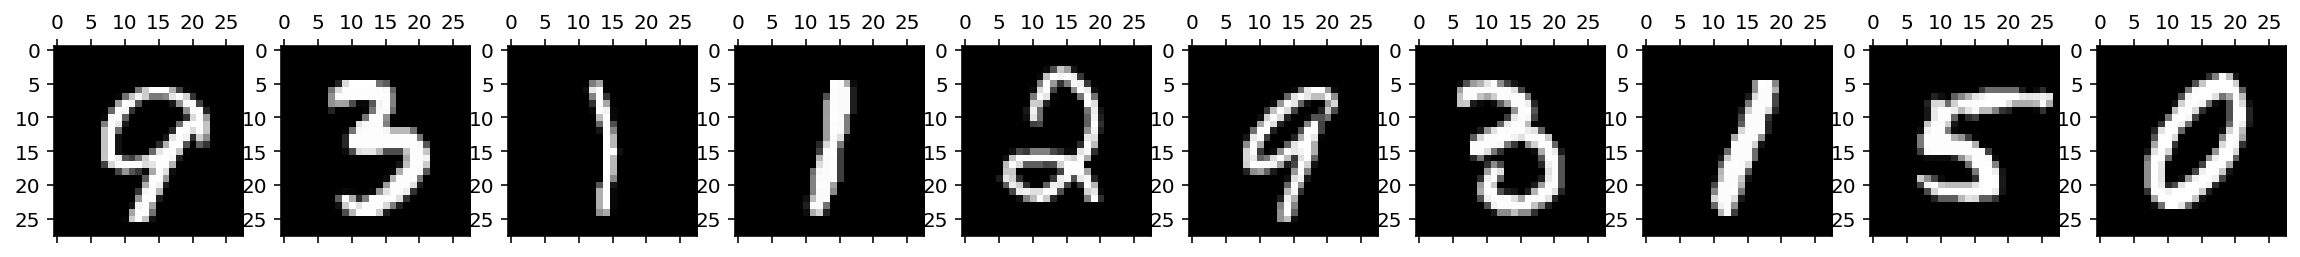

In [80]:
n_img=10
fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
[ax[i].matshow(XT[i].reshape(28, -1), cmap='gray') for i in range(n_img)];

In [81]:
XP=np.dot(X_train_pca, pca.components_).round(4)
XP

array([[ 0., -0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [-0.,  0., -0., ...,  0.,  0.,  0.]])

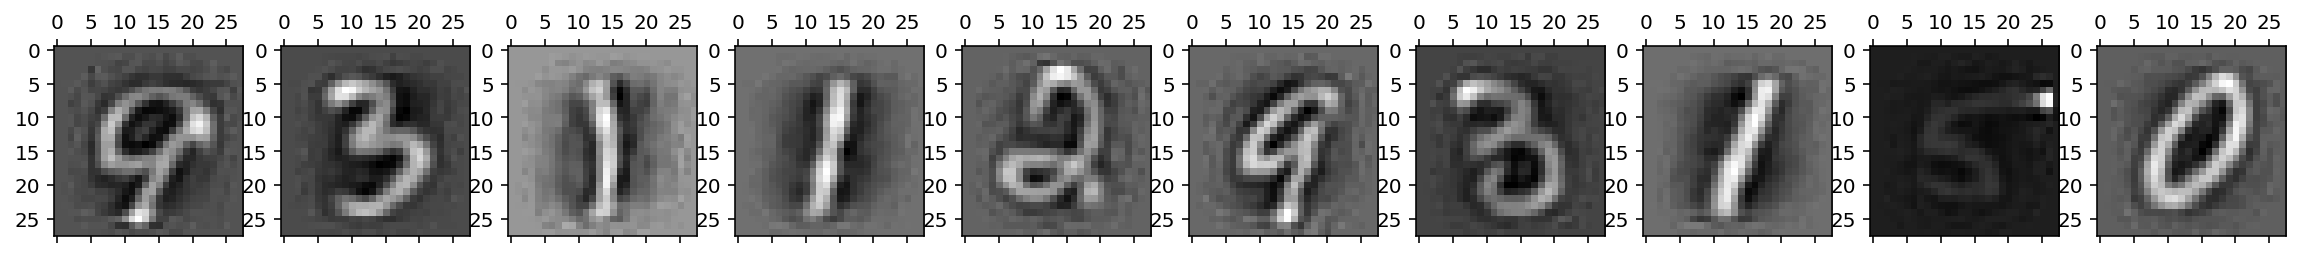

In [82]:
n_img=10
fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
[ax[i].matshow(XP[i].reshape(28, -1), cmap='gray') for i in range(n_img)];

### compare different components

In [83]:
def plot_varying_components(dfX, n_img=10, n_components=[10, 20, 30, 50, 100, 200, 300], img_shape=(28, 28)):
    '''
    แสดง image ที่สร้างจาก pca ที่ n_components ต่าง ๆ กัน
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]
    
    X_train=dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train
    
    fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width)) for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full', 
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components=n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component}, {X_train_pca.shape}')
        XP=np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width)) for i in range(n_img)]


n_component = 5, (4000, 5)
n_component = 10, (4000, 10)
n_component = 50, (4000, 50)
n_component = 100, (4000, 100)
n_component = 300, (4000, 300)
n_component = 500, (4000, 500)


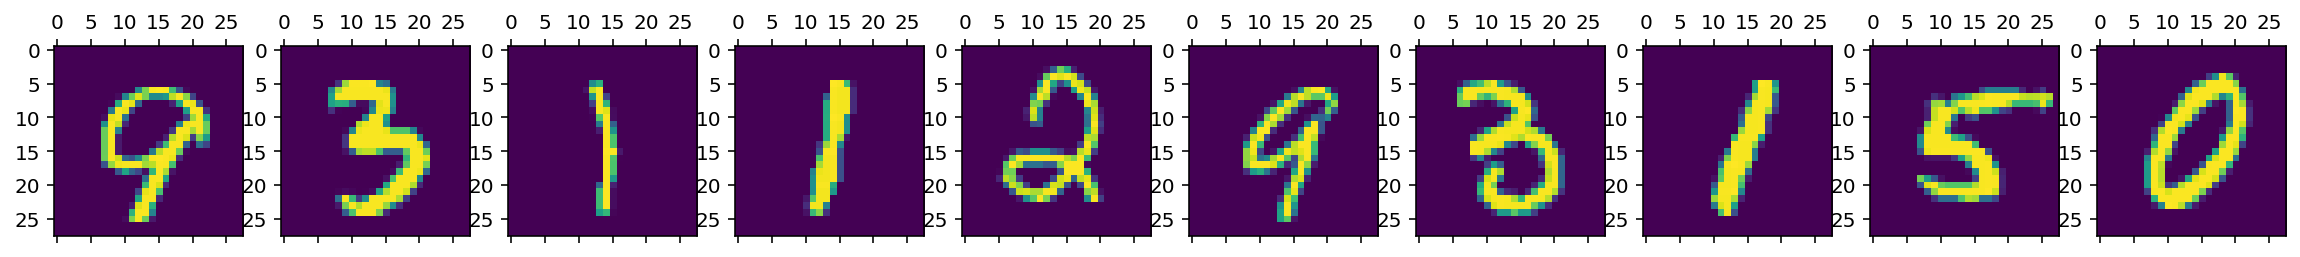

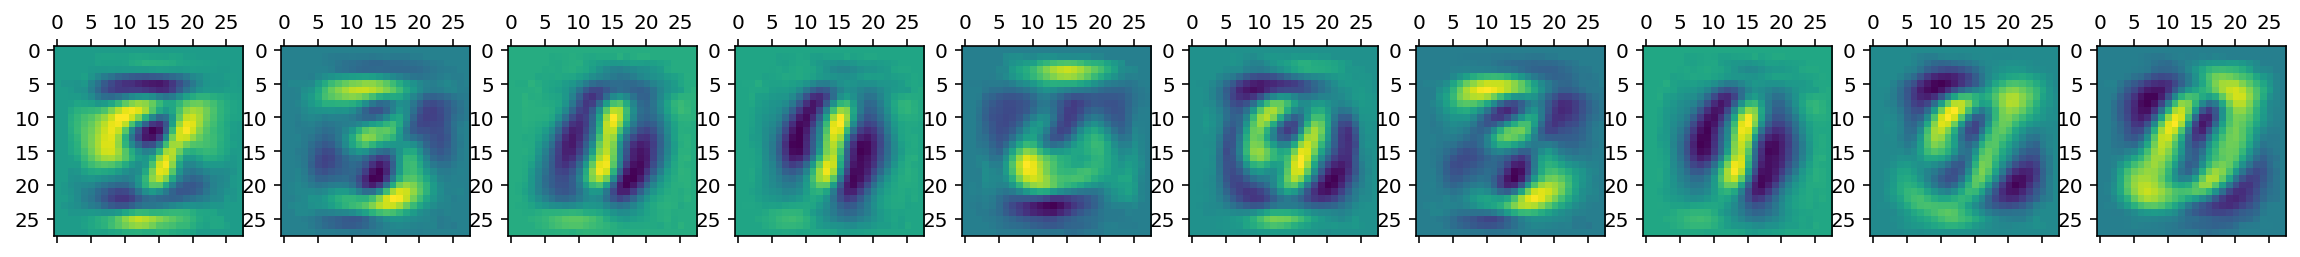

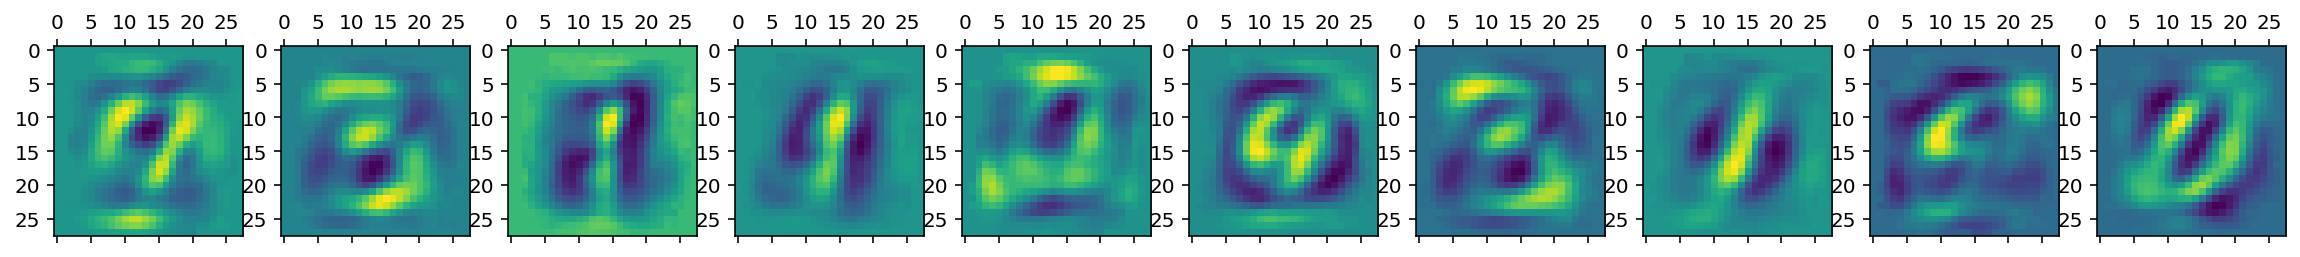

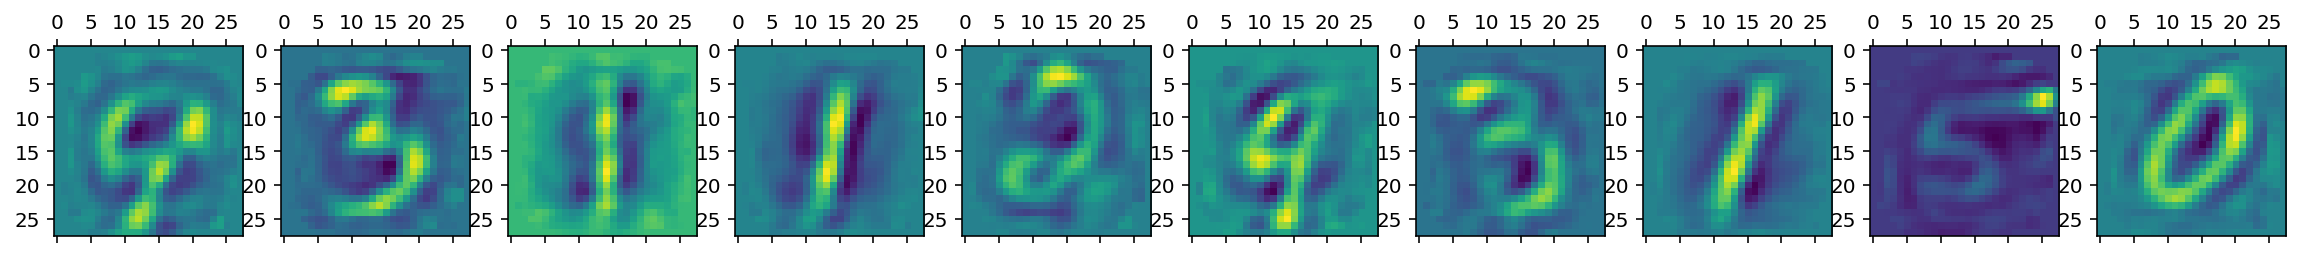

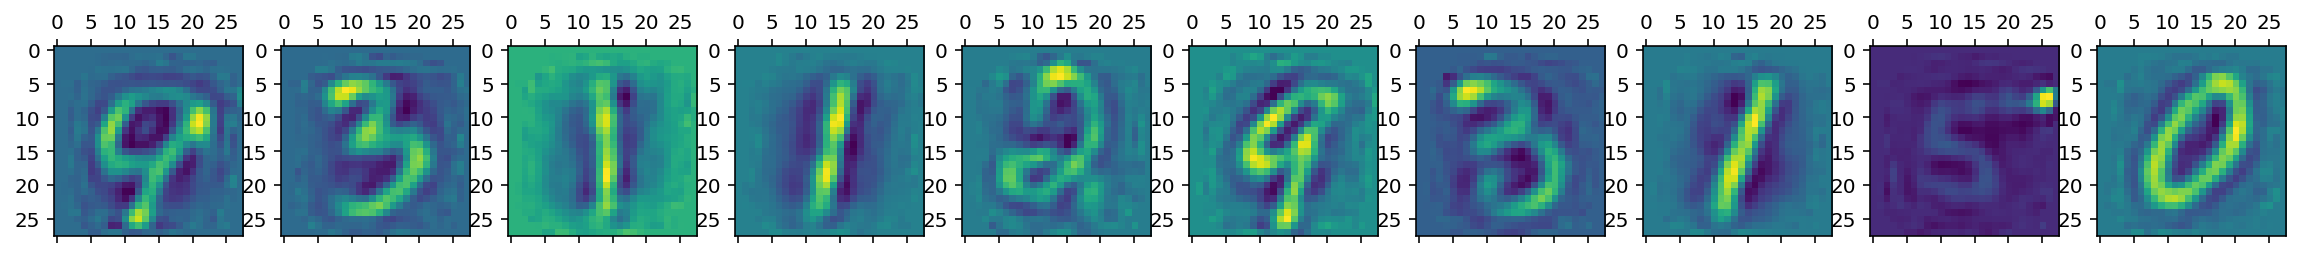

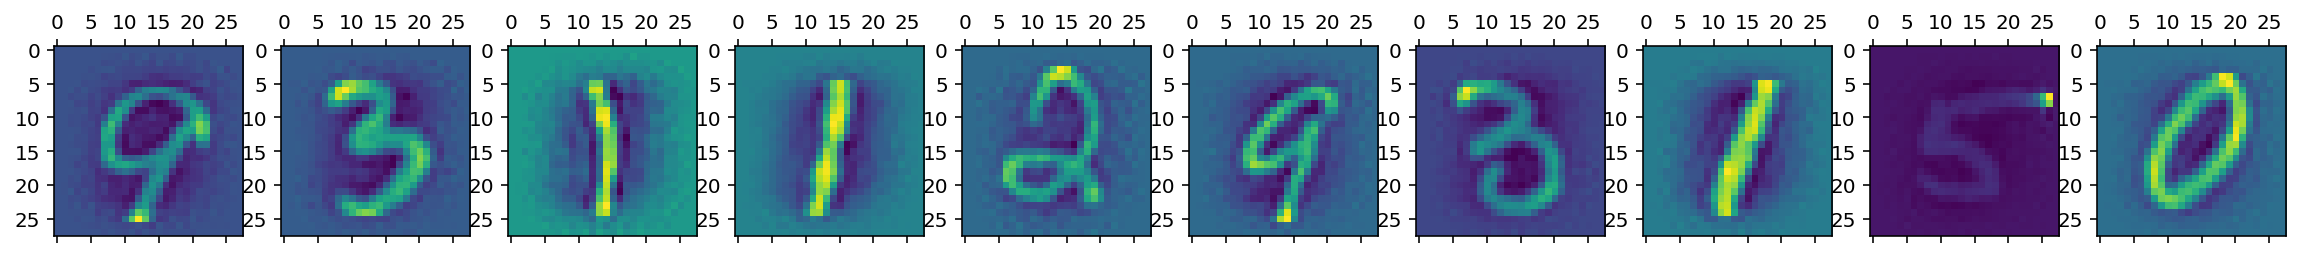

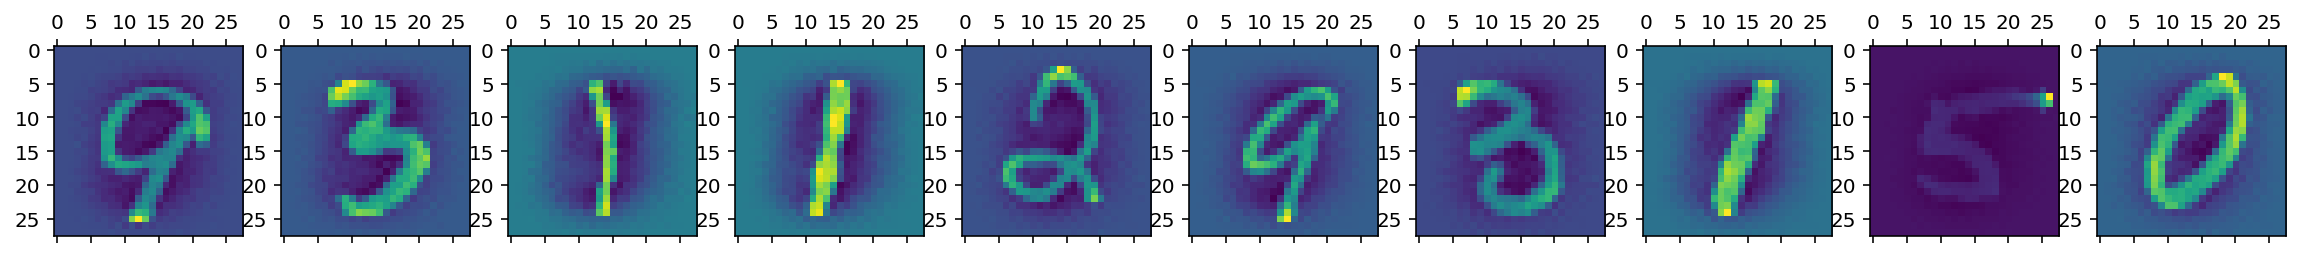

In [84]:
plot_varying_components(X_train, 10, [5, 10, 50, 100, 300, 500], (28, 28))
# plot_varying_compoents(X_train, [10, 50, 100, 200, 300])

## logistic regression

In [85]:
model = LogisticRegression(multi_class="auto")
model.fit(X_train_pca, y_train)

C:\Users\prasert\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
model.score(X_train_pca, y_train)

0.98575

In [87]:
model.score(X_test_pca, y_test)

0.877

In [88]:
X_test_pca[:1]

array([[-3.92682198,  7.73787859, -7.14133709,  0.11640201, -0.33275934, -3.03377711,  2.29904548,  5.02767802, -4.37690025, -1.11675692, -4.45618756,  3.19775471, -4.26660532, -1.96780917,  1.12005124, -3.27059211, -0.17516369, -3.46560905,  0.87932062, -2.22138017, -2.2844376 , -4.16244923,  0.76310535, -3.95784472,  0.2284606 ,  0.64422423, -0.57474914,  4.52276878, -0.42934812, -0.50537462, -3.1200537 ,  2.5848081 , -1.17716051,  2.28133643, -3.46113064,  0.98903483,  1.63103065,  1.08754457,  5.57201513, -1.90879053,  0.11406812, -2.23027564,  1.73441373, -0.71065354, -1.71823628,  1.49614236, -0.88778169, -0.82248965,  4.78870826,  2.21429556, -2.46562358,  3.83897275, -2.60158462,  0.90095709, -1.17848007, -0.29639655, -0.98370232,  3.05314314,  3.26208078, -2.98951193, -0.47910807,  1.34126979,  3.82558989, -0.11509166, -0.33907664, -0.44432431, -4.54439084, -4.20332926, -1.29479923, -2.90953869, -1.33405558,  2.42253327, -1.11269557,  1.65084744,  1.70736514,  1.67590712,
    

In [89]:
predicted = model.predict(X_test_pca)
predicted

array([7, 6, 1, 0, 7, 1, 3, 2, 4, 6, 4, 4, 9, 6, 4, 0, 9, 8, 8, 0, 7, 2, 2, 4, 9, 0, 7, 8, 0, 1, 3, 1, 9, 7, 9, 3, 8, 5, 5, 3, 8, 7, 4, 2, 8, 6, 1, 0, 3, 2, 3, 1, 2, 4, 0, 2, 2, 2, 8, 2, 3, 7, 4, 2, 3, 9, 2, 4, 3, 1, 0, 0, 3, 2, 9, 4, 1, 8, 3, 1, 2, 1, 2, 6, 6, 3, 4, 3, 9, 7, 3, 9, 0, 2, 8, 2, 7, 1, 0, 1, 1, 8, 0, 8, 0, 0, 5, 8, 5, 0, 5, 6, 5, 7, 2, 6, 2, 3, 4, 7, 4, 9, 3, 5, 6, 4, 3, 6, 5, 9, 4, 6, 0, 7, 2, 6, 1, 0, 6, 7, 2, 9, 0, 6, 8, 6, 3, 7, 4, 4, 7, 1, 4, 1, 4, 3, 7, 1, 7, 1, 6, 2, 1, 2, 7, 4, 1, 1, 9, 7, 8, 7, 8, 1, 5, 9, 1, 2, 2, 7, 6, 8, 9, 4, 2, 2, 4, 2, 7, 8, 0, 1, 3, 6, 6, 6, 5, 4, 4, 6, 1, 1, 6, 7, 5, 7, 9, 1, 7, 4, 1, 5, 0, 9, 1, 6, 4, 9, 6, 3, 0, 5, 4, 0, 9, 6, 6, 6, 3, 0, 9, 0, 3, 3, 1, 1, 3, 7, 6, 5, 7, 3, 1, 5, 1, 0, 4, 8, 0, 2, 8, 6, 6, 2, 7, 4, 2, 6, 3, 4, 7, 0, 2, 6, 3, 1, 4, 8, 4, 0, 8, 0, 2, 6, 5, 4, 2, 5, 1, 9, 2, 5, 8, 5, 1, 7, 8, 0, 4, 1, 1, 1, 1, 0, 9, 1, 2, 1, 5, 0, 7, 7, 4, 0, 4, 1, 2, 5, 1, 8, 8, 3, 9, 2, 6, 6, 4, 8, 7, 7, 1, 8, 9, 1, 1, 9, 1, 2, 2, 5, 6,


In [90]:
y_test[:10]

2969    7
1846    6
3506    1
1876    0
160     7
1773    1
4420    3
3281    2
174     4
2360    6
Name: class, dtype: int64

In [91]:
cm=metrics.confusion_matrix(y_test, predicted)
cm

array([[ 88,   0,   0,   0,   0,   1,   2,   0,   1,   0],
       [  0, 119,   1,   0,   0,   0,   1,   0,   0,   0],
       [  4,   1,  92,   2,   0,   0,   2,   2,   0,   1],
       [  1,   1,   3,  88,   1,   5,   1,   1,   2,   1],
       [  2,   2,   0,   0,  82,   0,   3,   1,   0,   2],
       [  3,   1,   2,   7,   1,  72,   1,   0,   3,   2],
       [  4,   0,   5,   0,   2,   3,  81,   0,   2,   0],
       [  1,   0,   5,   2,   4,   0,   0,  91,   1,   2],
       [  0,   2,   6,   3,   1,   4,   0,   2,  68,   0],
       [  1,   0,   2,   2,   3,   0,   0,   2,   0,  96]], dtype=int64)

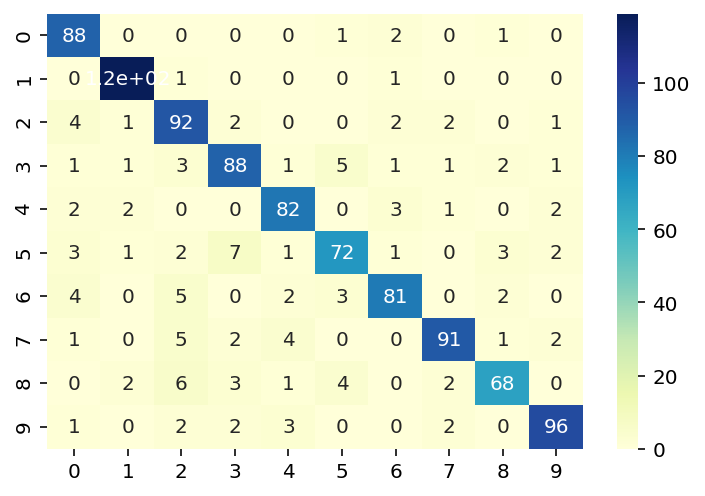

In [92]:
sns.heatmap(cm, annot=True, cmap="YlGnBu");

In [93]:
cm=cm.astype('float')
cm[cm == 0] = np.nan
cm

array([[ 88.,  nan,  nan,  nan,  nan,   1.,   2.,  nan,   1.,  nan],
       [ nan, 119.,   1.,  nan,  nan,  nan,   1.,  nan,  nan,  nan],
       [  4.,   1.,  92.,   2.,  nan,  nan,   2.,   2.,  nan,   1.],
       [  1.,   1.,   3.,  88.,   1.,   5.,   1.,   1.,   2.,   1.],
       [  2.,   2.,  nan,  nan,  82.,  nan,   3.,   1.,  nan,   2.],
       [  3.,   1.,   2.,   7.,   1.,  72.,   1.,  nan,   3.,   2.],
       [  4.,  nan,   5.,  nan,   2.,   3.,  81.,  nan,   2.,  nan],
       [  1.,  nan,   5.,   2.,   4.,  nan,  nan,  91.,   1.,   2.],
       [ nan,   2.,   6.,   3.,   1.,   4.,  nan,   2.,  68.,  nan],
       [  1.,  nan,   2.,   2.,   3.,  nan,  nan,   2.,  nan,  96.]])

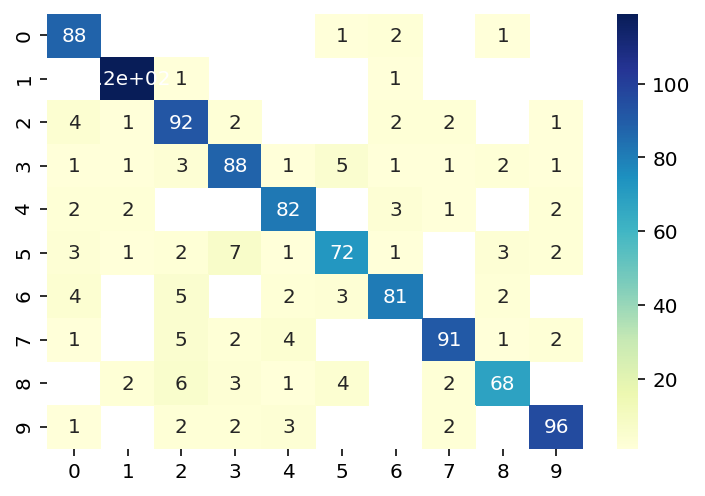

In [94]:
sns.heatmap(cm, annot=True, cmap="YlGnBu");

In [95]:
model.score(X_test_pca, y_test)

0.877

In [96]:
metrics.accuracy_score(y_test, predicted)

0.877

In [97]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        92
           1       0.94      0.98      0.96       121
           2       0.79      0.88      0.84       104
           3       0.85      0.85      0.85       104
           4       0.87      0.89      0.88        92
           5       0.85      0.78      0.81        92
           6       0.89      0.84      0.86        97
           7       0.92      0.86      0.89       106
           8       0.88      0.79      0.83        86
           9       0.92      0.91      0.91       106

    accuracy                           0.88      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.88      0.88      1000



In [98]:
y_test

2969    7
1846    6
3506    1
1876    0
160     7
       ..
3318    9
1031    2
4154    4
1531    2
739     0
Name: class, Length: 1000, dtype: int64

In [99]:
y_test.reset_index(drop=True)

0      7
1      6
2      1
3      0
4      7
      ..
995    9
996    2
997    4
998    2
999    0
Name: class, Length: 1000, dtype: int64

In [100]:
predicted

array([7, 6, 1, 0, 7, 1, 3, 2, 4, 6, 4, 4, 9, 6, 4, 0, 9, 8, 8, 0, 7, 2, 2, 4, 9, 0, 7, 8, 0, 1, 3, 1, 9, 7, 9, 3, 8, 5, 5, 3, 8, 7, 4, 2, 8, 6, 1, 0, 3, 2, 3, 1, 2, 4, 0, 2, 2, 2, 8, 2, 3, 7, 4, 2, 3, 9, 2, 4, 3, 1, 0, 0, 3, 2, 9, 4, 1, 8, 3, 1, 2, 1, 2, 6, 6, 3, 4, 3, 9, 7, 3, 9, 0, 2, 8, 2, 7, 1, 0, 1, 1, 8, 0, 8, 0, 0, 5, 8, 5, 0, 5, 6, 5, 7, 2, 6, 2, 3, 4, 7, 4, 9, 3, 5, 6, 4, 3, 6, 5, 9, 4, 6, 0, 7, 2, 6, 1, 0, 6, 7, 2, 9, 0, 6, 8, 6, 3, 7, 4, 4, 7, 1, 4, 1, 4, 3, 7, 1, 7, 1, 6, 2, 1, 2, 7, 4, 1, 1, 9, 7, 8, 7, 8, 1, 5, 9, 1, 2, 2, 7, 6, 8, 9, 4, 2, 2, 4, 2, 7, 8, 0, 1, 3, 6, 6, 6, 5, 4, 4, 6, 1, 1, 6, 7, 5, 7, 9, 1, 7, 4, 1, 5, 0, 9, 1, 6, 4, 9, 6, 3, 0, 5, 4, 0, 9, 6, 6, 6, 3, 0, 9, 0, 3, 3, 1, 1, 3, 7, 6, 5, 7, 3, 1, 5, 1, 0, 4, 8, 0, 2, 8, 6, 6, 2, 7, 4, 2, 6, 3, 4, 7, 0, 2, 6, 3, 1, 4, 8, 4, 0, 8, 0, 2, 6, 5, 4, 2, 5, 1, 9, 2, 5, 8, 5, 1, 7, 8, 0, 4, 1, 1, 1, 1, 0, 9, 1, 2, 1, 5, 0, 7, 7, 4, 0, 4, 1, 2, 5, 1, 8, 8, 3, 9, 2, 6, 6, 4, 8, 7, 7, 1, 8, 9, 1, 1, 9, 1, 2, 2, 5, 6,


In [101]:
dx=pd.DataFrame({'target': y_test.reset_index(drop=True), 'pred': predicted})
dx.head(20)

,target,pred
0,7,7
1,6,6
2,1,1
3,0,0
4,7,7
5,1,1
6,3,3
7,2,2
8,4,4
9,6,6


In [102]:
dx[dx.target != dx.pred].head()

,target,pred
14,3,4
18,5,8
21,8,2
43,6,2
47,2,0


In [103]:
X_test[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
dg=pd.concat([X_test.reset_index(drop=True), dx], axis=1)
dg[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target,pred
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,7


In [105]:
len(dg)

1000

In [106]:
dg.shape

(1000, 786)

## misclassified cases

In [107]:
dq=dg[dg.target != dg.pred]
dq[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target,pred
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,8
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,2
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,2
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [108]:
len(dq)

123

In [109]:
cm=metrics.confusion_matrix(dq.target, dq.pred)
cm

array([[0, 0, 0, 0, 0, 1, 2, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [4, 1, 0, 2, 0, 0, 2, 2, 0, 1],
       [1, 1, 3, 0, 1, 5, 1, 1, 2, 1],
       [2, 2, 0, 0, 0, 0, 3, 1, 0, 2],
       [3, 1, 2, 7, 1, 0, 1, 0, 3, 2],
       [4, 0, 5, 0, 2, 3, 0, 0, 2, 0],
       [1, 0, 5, 2, 4, 0, 0, 0, 1, 2],
       [0, 2, 6, 3, 1, 4, 0, 2, 0, 0],
       [1, 0, 2, 2, 3, 0, 0, 2, 0, 0]], dtype=int64)

In [110]:
incorrect = np.sum(cm) - np.trace(cm) # sum off diagonal
incorrect

123

In [111]:
D=dq.drop(columns=['target', 'pred']).to_numpy()
D[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [112]:
D.shape

(123, 784)

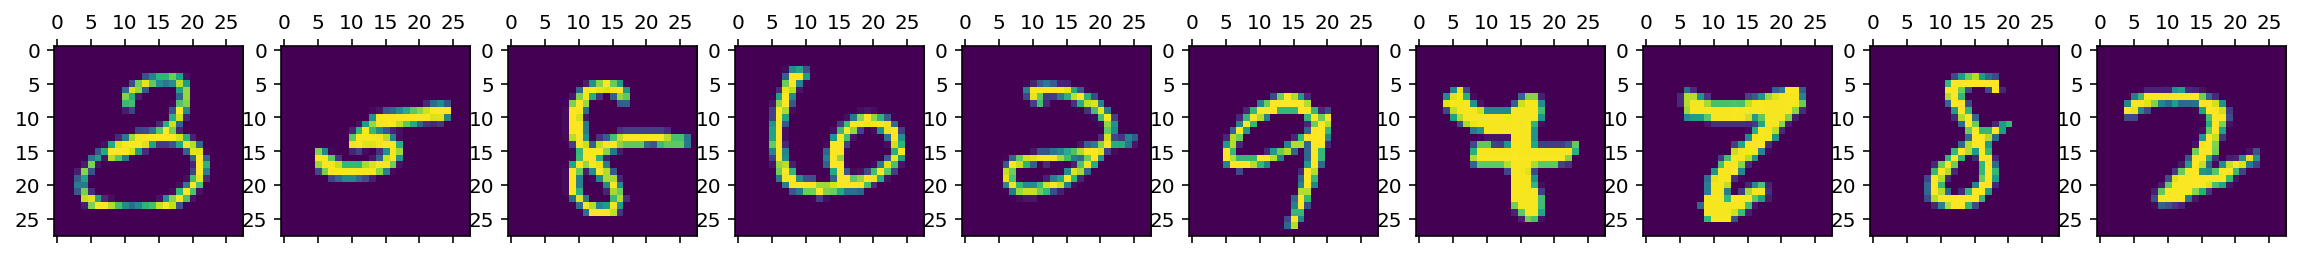

In [113]:
n=10
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(D[i].reshape(28, -1)) for i in range(n)];

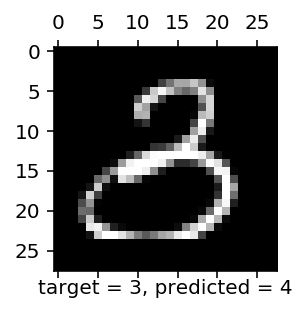

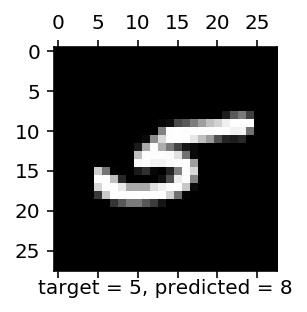

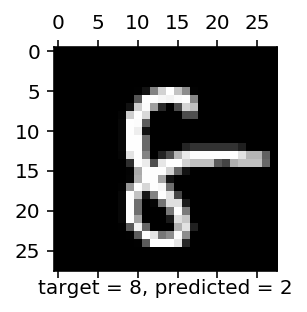

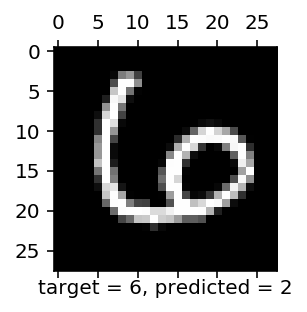

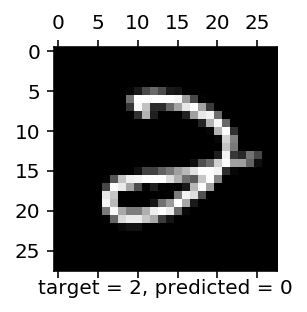

In [114]:
for i in range(5):
    matfig = plt.figure(figsize=(2,2))
    plt.matshow(D[i].reshape(28, -1), cmap='gray', fignum=matfig.number)
    plt.xlabel(f'target = {dq.target.iloc[i]}, predicted = {dq.pred.iloc[i]}')

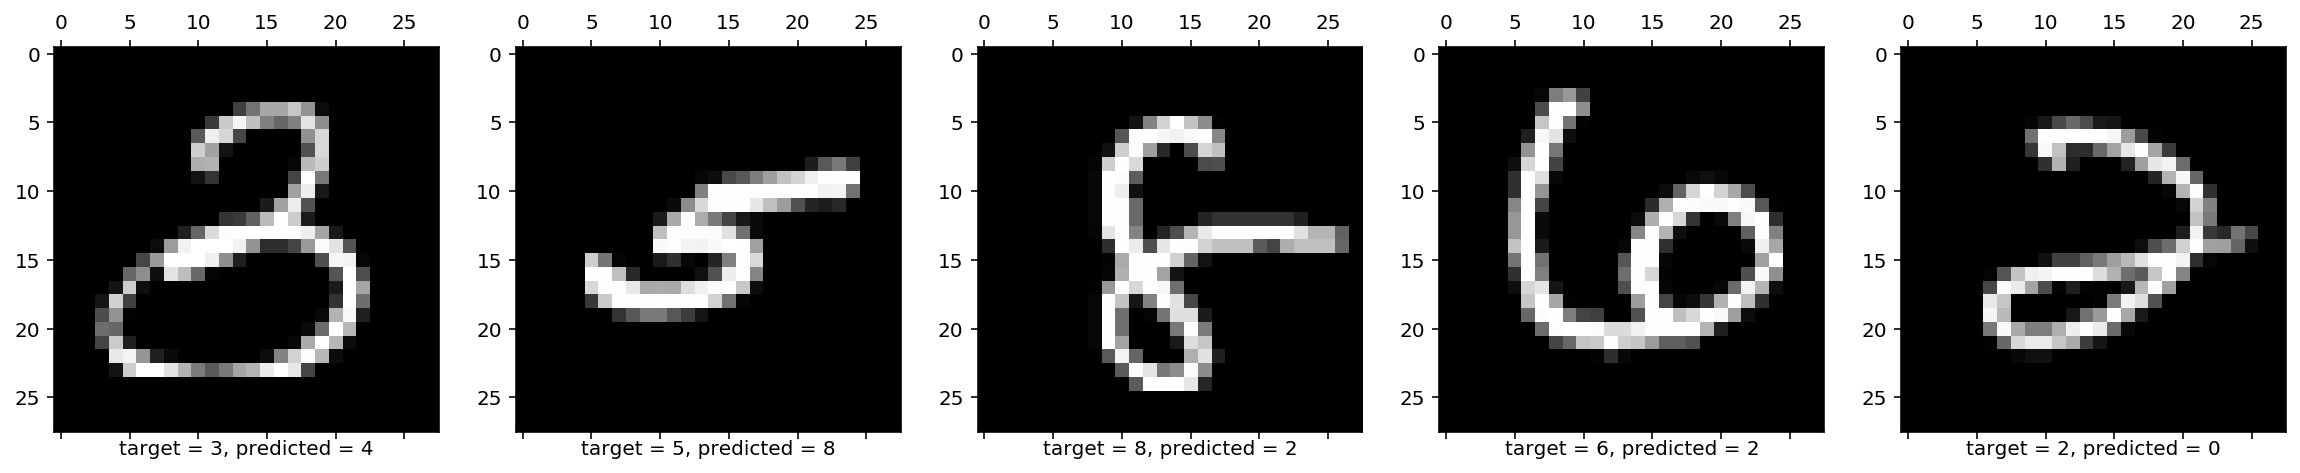

In [115]:
n=5
fig, ax = plt.subplots(1, n, figsize=(20, 4))
for i in range(n):
    ax[i].matshow(D[i].reshape(28, -1), cmap='gray')
    ax[i].set_xlabel(f'target = {dq.target.iloc[i]}, predicted = {dq.pred.iloc[i]}')